In [226]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches
%matplotlib inline

In [2]:
df_2016 = pd.read_csv("/Users/alex/Desktop/Columbia/github/data-studio-projects/code/Project_2/pension funds data and pitch/pensionskassenvergleich/tabula-anlagerenditen_2017.csv")

In [3]:
df_2013 = pd.read_csv("/Users/alex/Desktop/Columbia/github/data-studio-projects/code/Project_2/pension funds data and pitch/pensionskassenvergleich/tabula-anlagerenditen_2014.csv")

In [4]:
df_2016.Pension_fund = df_2016.Pension_fund.str.strip()

In [5]:
df_2013.Pension_fund = df_2013.Pension_fund.str.strip()

In [220]:
df_2016.TER_2016.mean()

0.53913043478260869

In [6]:
df_2016 = df_2016.merge(df_2013, on='Pension_fund', how='left')

# create new variable for alternatives + stock quota
df_2016['stock_alt_2016'] = df_2016.Stocks_2016 + df_2016.Alternatives_2016

In [7]:
# remove Index-Data, only funds with historic data
pf_data_historic = df_2016[~df_2016["Pension_fund"].str.contains("Pictet-Index")].dropna()

# remove Index-Data, all funds
pf_data_current = df_2016[~df_2016["Pension_fund"].str.contains("Pictet-Index")]

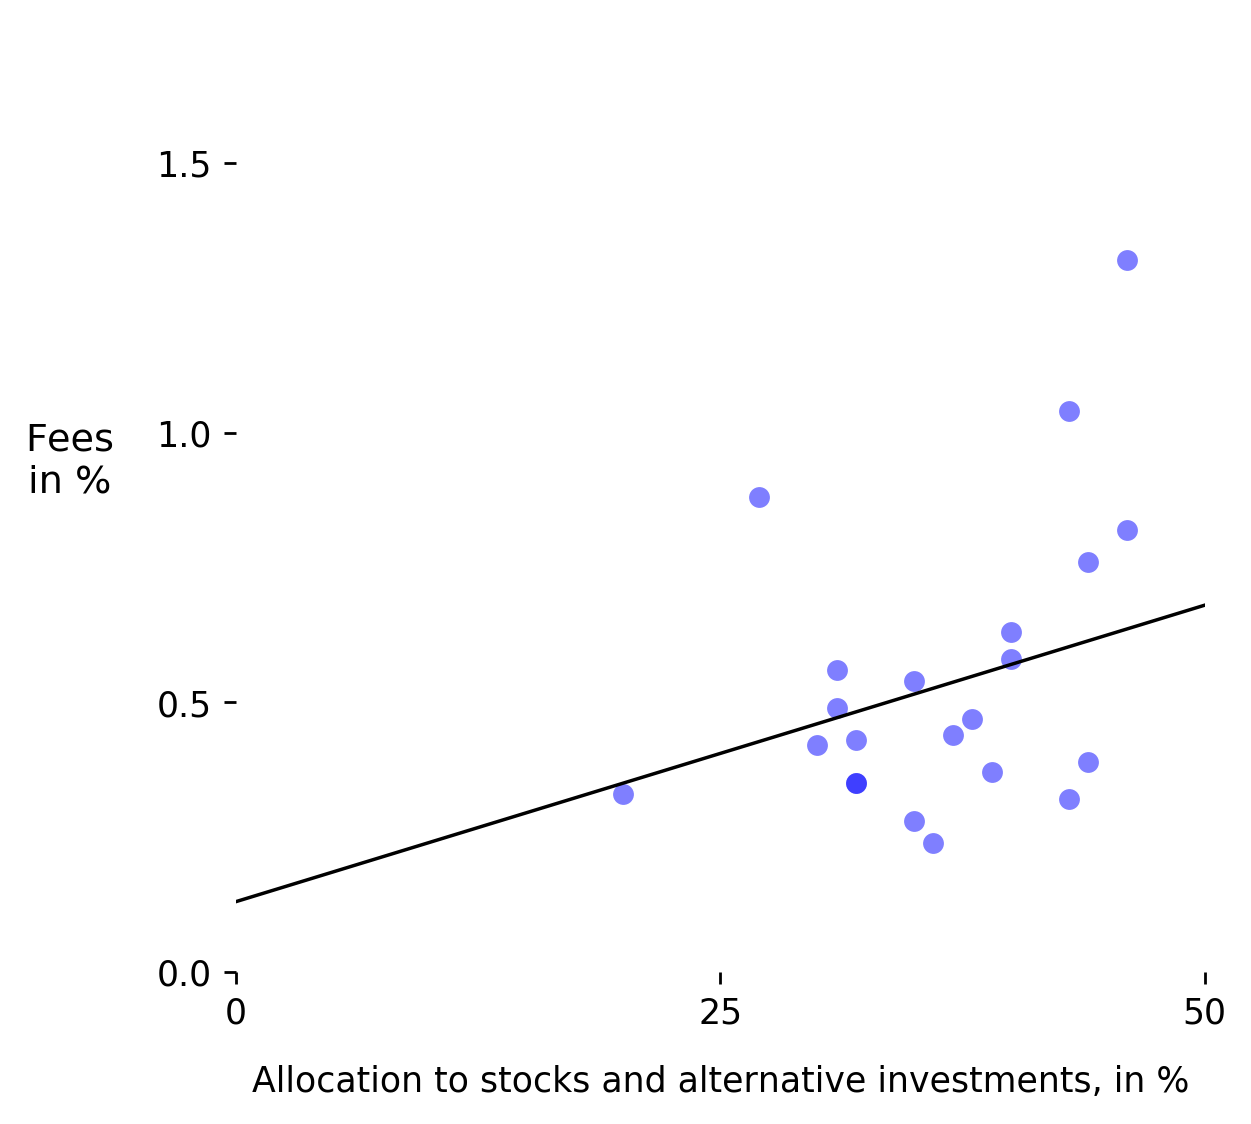

In [341]:
# compare costs and allocations
x= pf_data_current.stock_alt_2016
y= pf_data_current.TER_2016
fig, ax = plt.subplots(figsize=(5,5), dpi=250)
fit = np.polyfit(x, y, deg=1)
ax.set_xlim(0,50)
ax.set_xticks([0,25,50])

ax.set_yticks([0,0.5,1,1.5])
ax.set_ylim(0,1.75)
ax.set_xlabel("Allocation to stocks and alternative investments, in %", labelpad=10)
ax.set_ylabel("Fees\nin %", rotation=0, fontsize=11, labelpad=25)
ax.scatter(x, y, color="blue", marker="o", label = "Pension funds", alpha=0.5, linewidth=0)
x_fit = np.arange(0,51)
y_fit = fit[1] + fit[0]*x_fit
ax.plot(x_fit, y_fit, color="black", linewidth = 1, label = "Trend line")
for item in ['top','right','bottom','left']:
    ax.spines[item].set_visible(False)

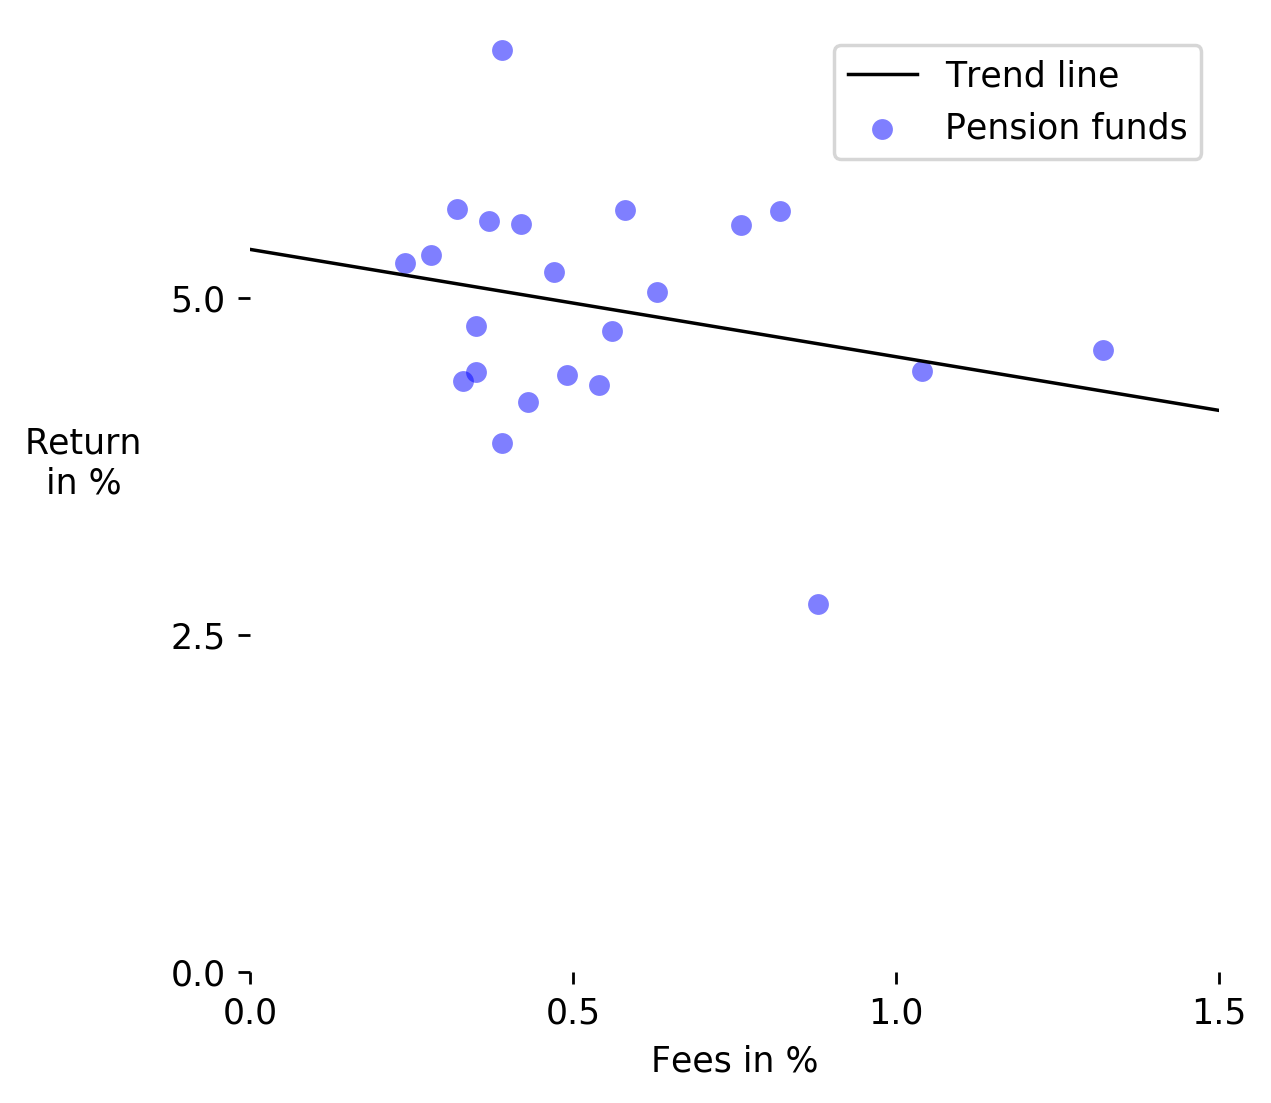

In [183]:
# compare costs and returns

#use only data with 2012 - 2016 returns
pf_data_current_with_return = pf_data_current[~pf_data_current.return_2012_2016.isnull()]

y= pf_data_current_with_return.return_2012_2016
x= pf_data_current_with_return.TER_2016
fig, ax = plt.subplots(figsize=(5,5), dpi=250)
fit = np.polyfit(x, y, deg=1)
ax.set_xlim(0,1.4)


ax.set_ylim(0,7)
ax.set_ylabel("Return\nin %", rotation=0, labelpad=25)
ax.set_xticks([0,0.5,1,1.5])
ax.set_yticks([0,2.5,5])
ax.set_xlabel("Fees in %")
ax.scatter(x, y, color="blue", marker="o", label = "Pension funds", alpha=0.5, linewidth=0)

x_fit = np.arange(0,50)
y_fit = fit[1] + fit[0]*x_fit
ax.plot(x_fit, y_fit, color="black", linewidth = 1, label = "Trend line")
ax.legend()
for item in ['top','right','bottom','left']:
    ax.spines[item].set_visible(False)

In [9]:
df_2016[df_2016["Pension_fund"].str.contains("Pictet-Index 25")]["return_2012_2016"]

3    5.27
Name: return_2012_2016, dtype: float64

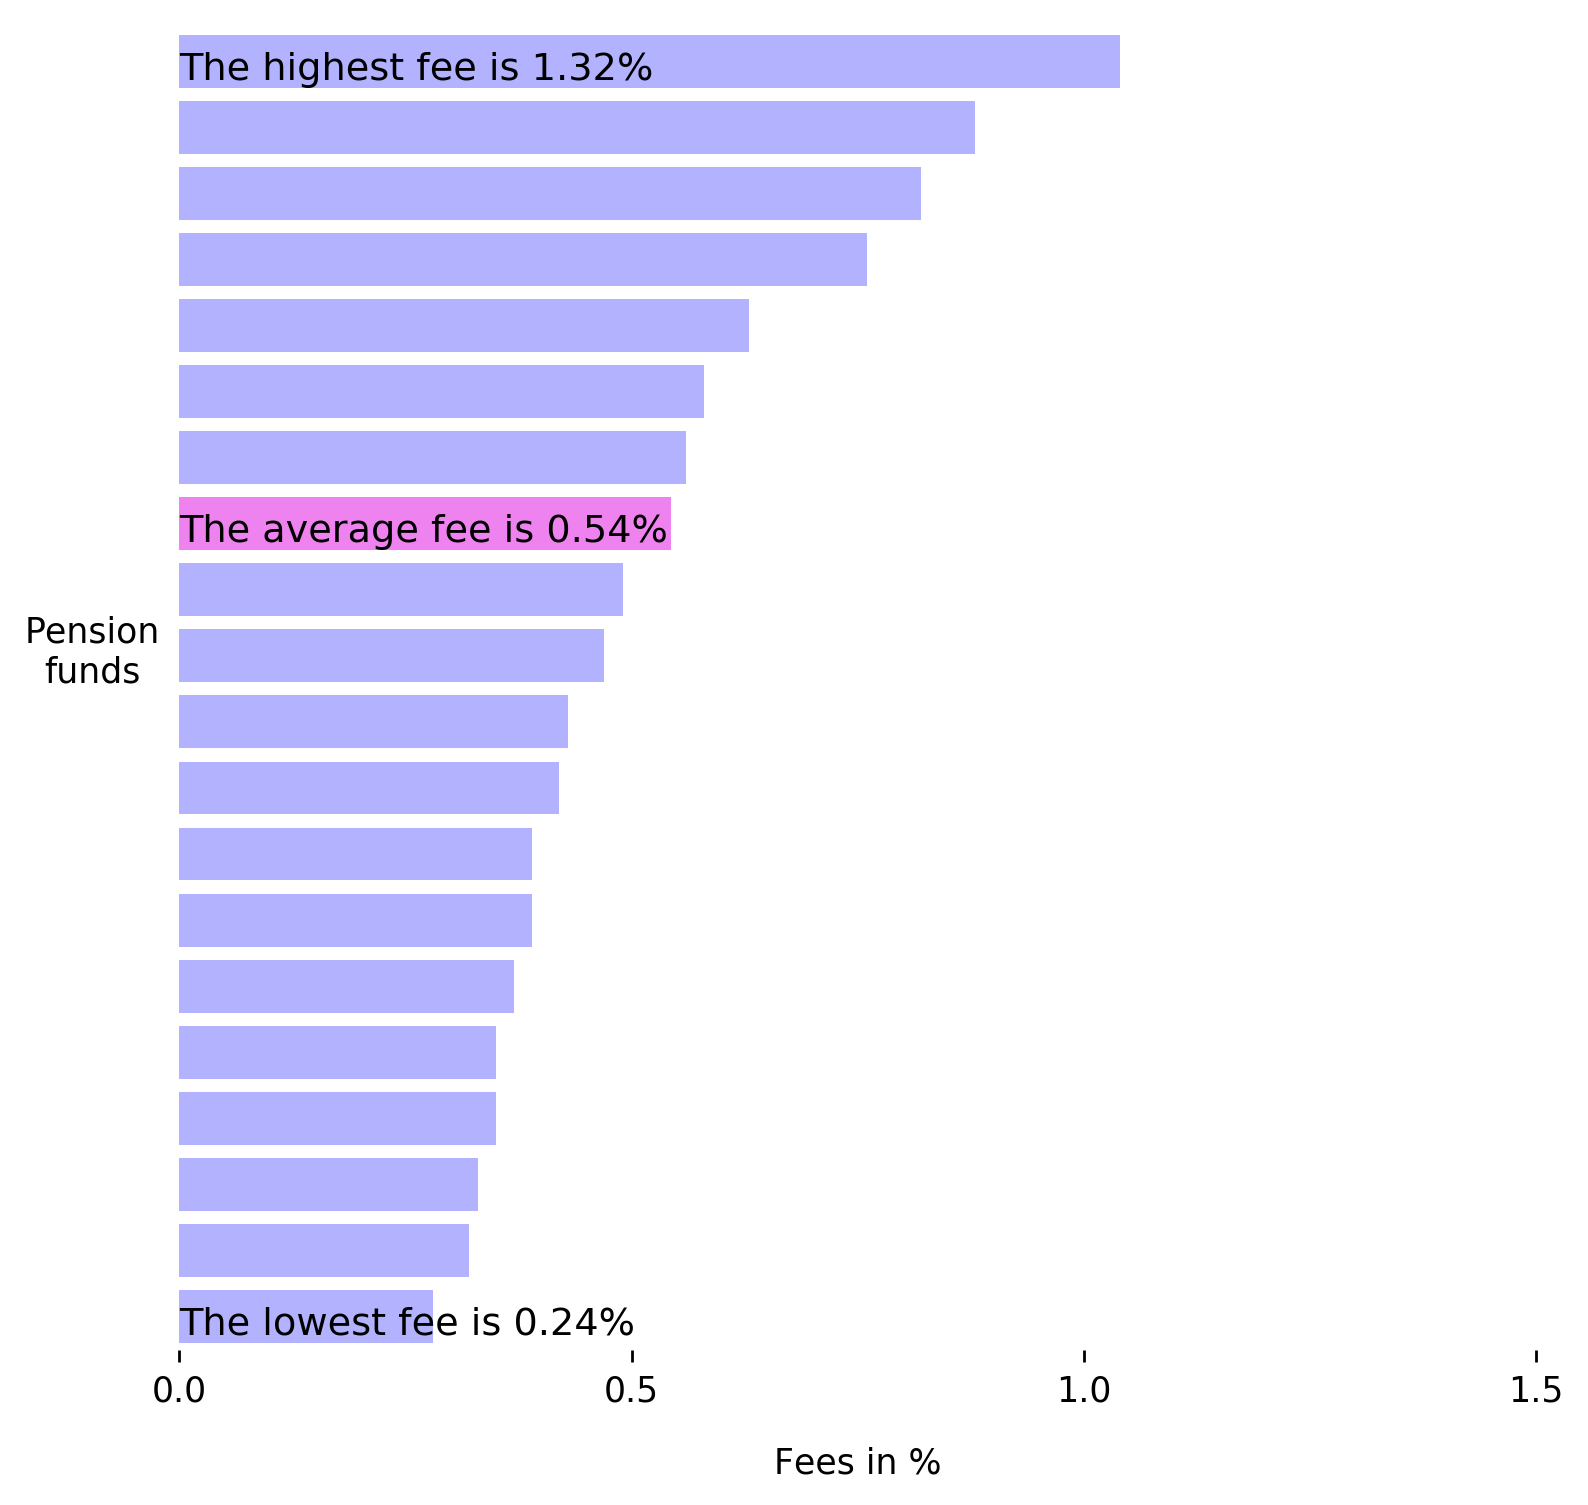

In [257]:
# allocation, returns and fees

x= pf_data_current_with_return.Stocks_2016

costs = pf_data_current_with_return.TER_2016.sort_values()
mean_costs = pf_data_current_with_return.TER_2016.mean()

fig, ax = plt.subplots(figsize=(7,7), dpi=250)
y_pos = np.arange(len(costs))
ax.barh(y_pos, width=costs,  color="blue", linewidth = 1, alpha=0.3, label = "Fund fees")
ax.barh(13, width=mean_costs,  color="violet", linewidth = 1, alpha=1, label = "Average fees")
plt.ylim(0.5,20.5)
ax.set_ylabel('Pension\nfunds', rotation=0, labelpad = 25)
ax.tick_params(axis='y', left='off', labelleft='off')
legend = ax.legend(frameon = 1)
frame = legend.get_frame()
frame.set_facecolor('white')

ax.set_xlabel("Fees in %", labelpad = 11)
ax.set_xticks([0,0.5,1,1.5])


ax.text(0, 1.15,\
        "The lowest fee is 0.24%",
        fontsize="11",
        horizontalalignment='left',
        verticalalignment='top')


ax.text(0, 13.15,\
        "The average fee is 0.54%",
        fontsize="11",
        horizontalalignment='left',
        verticalalignment='top')


ax.text(0, 20.15,\
        "The highest fee is 1.32%",
        fontsize="11",
        horizontalalignment='left',
        verticalalignment='top')


for item in ['top','right','bottom','left']:
    ax.spines[item].set_visible(False)
    
    
ax.legend().set_visible(False)

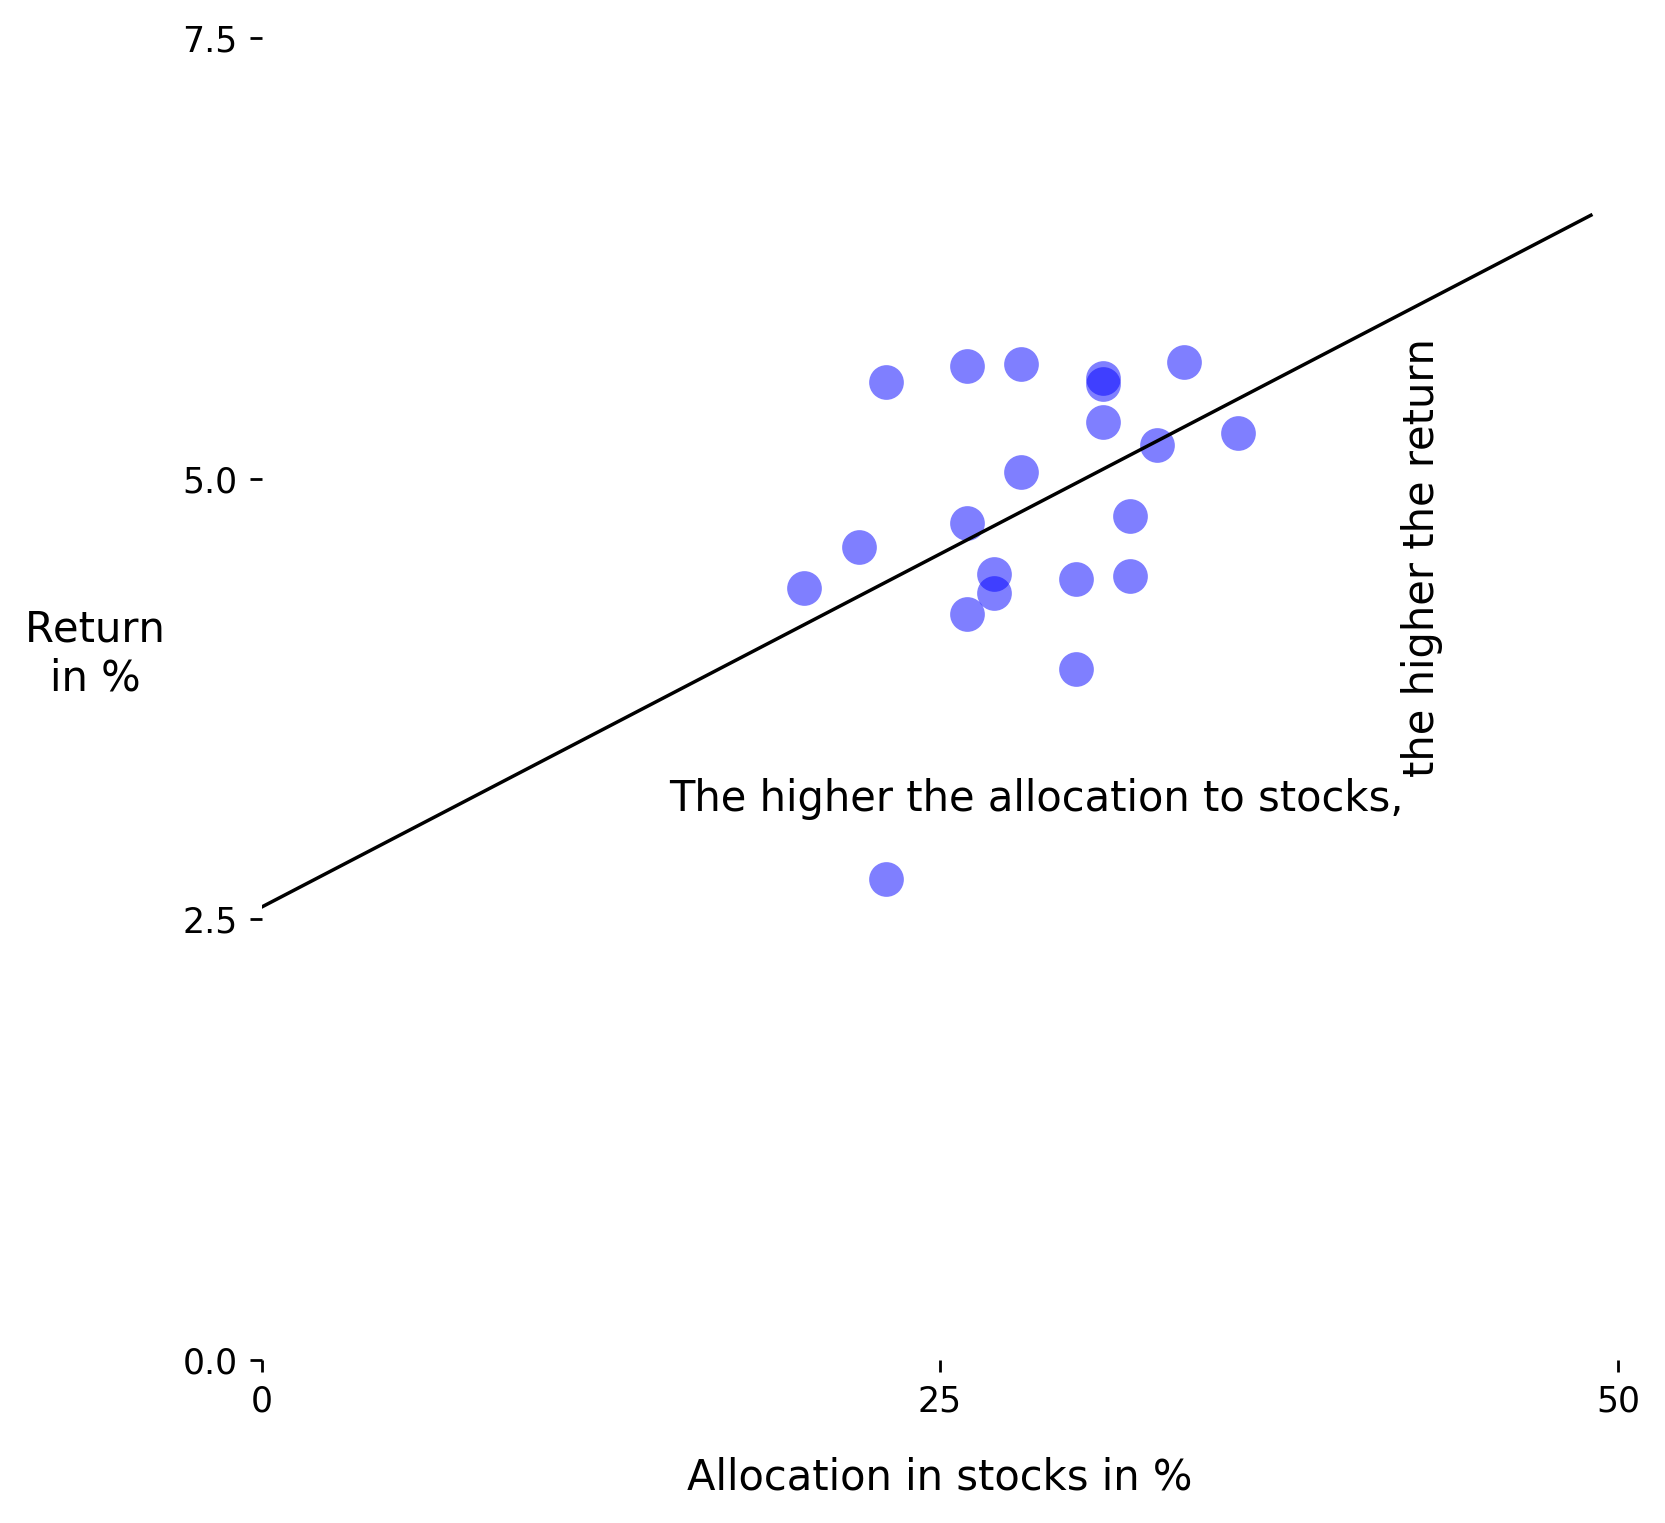

In [281]:
# allocation, returns and fees

y= pf_data_current_with_return.return_2012_2016
x= pf_data_current_with_return.Stocks_2016

costs = pf_data_current_with_return.TER_2016
mean_costs = pf_data_current_with_return.TER_2016.mean()

mean1= pf_data_current_with_return.return_2012_2016

index_return = float(df_2016[df_2016["Pension_fund"]\
                       .str.contains("Pictet-Index 25")]\
                       ["return_2012_2016"].astype(float))
    
index_alloc = 25

fig, ax = plt.subplots(figsize=(7,7), dpi=250)


ax.set_xlim(0,50)
ax.set_xticks([0,25,50])

ax.set_ylim(2.5,7)

ax.set_ylabel("Return\nin %", fontsize=12, rotation=0, labelpad = 25)
ax.set_xlabel("Allocation in stocks in %", fontsize=12, labelpad = 11)
ax.scatter(x, y, color="blue", marker="o", \
           label = "Pension funds", s=100, alpha=0.5, linewidth=0)

fit = np.polyfit(x, y, deg=1)
x_fit = np.arange(0,50)
y_fit = fit[1] + fit[0]*x_fit

ax.set_yticks([0,2.5,5,7.5])

ax.plot(x_fit, y_fit, color="black", linewidth = 1, label = "Trend line")

ax.text(15, 3.3,\
        "The higher the allocation to stocks,",
        fontsize="12",
        horizontalalignment='left',
        verticalalignment='top')

ax.text(42, 5.8,\
        "the higher the return",
        rotation=90,
        fontsize="12",
        horizontalalignment='left',
        verticalalignment='top')

for item in ['top','right','bottom','left']:
    ax.spines[item].set_visible(False)
ax.legend().set_visible(False)


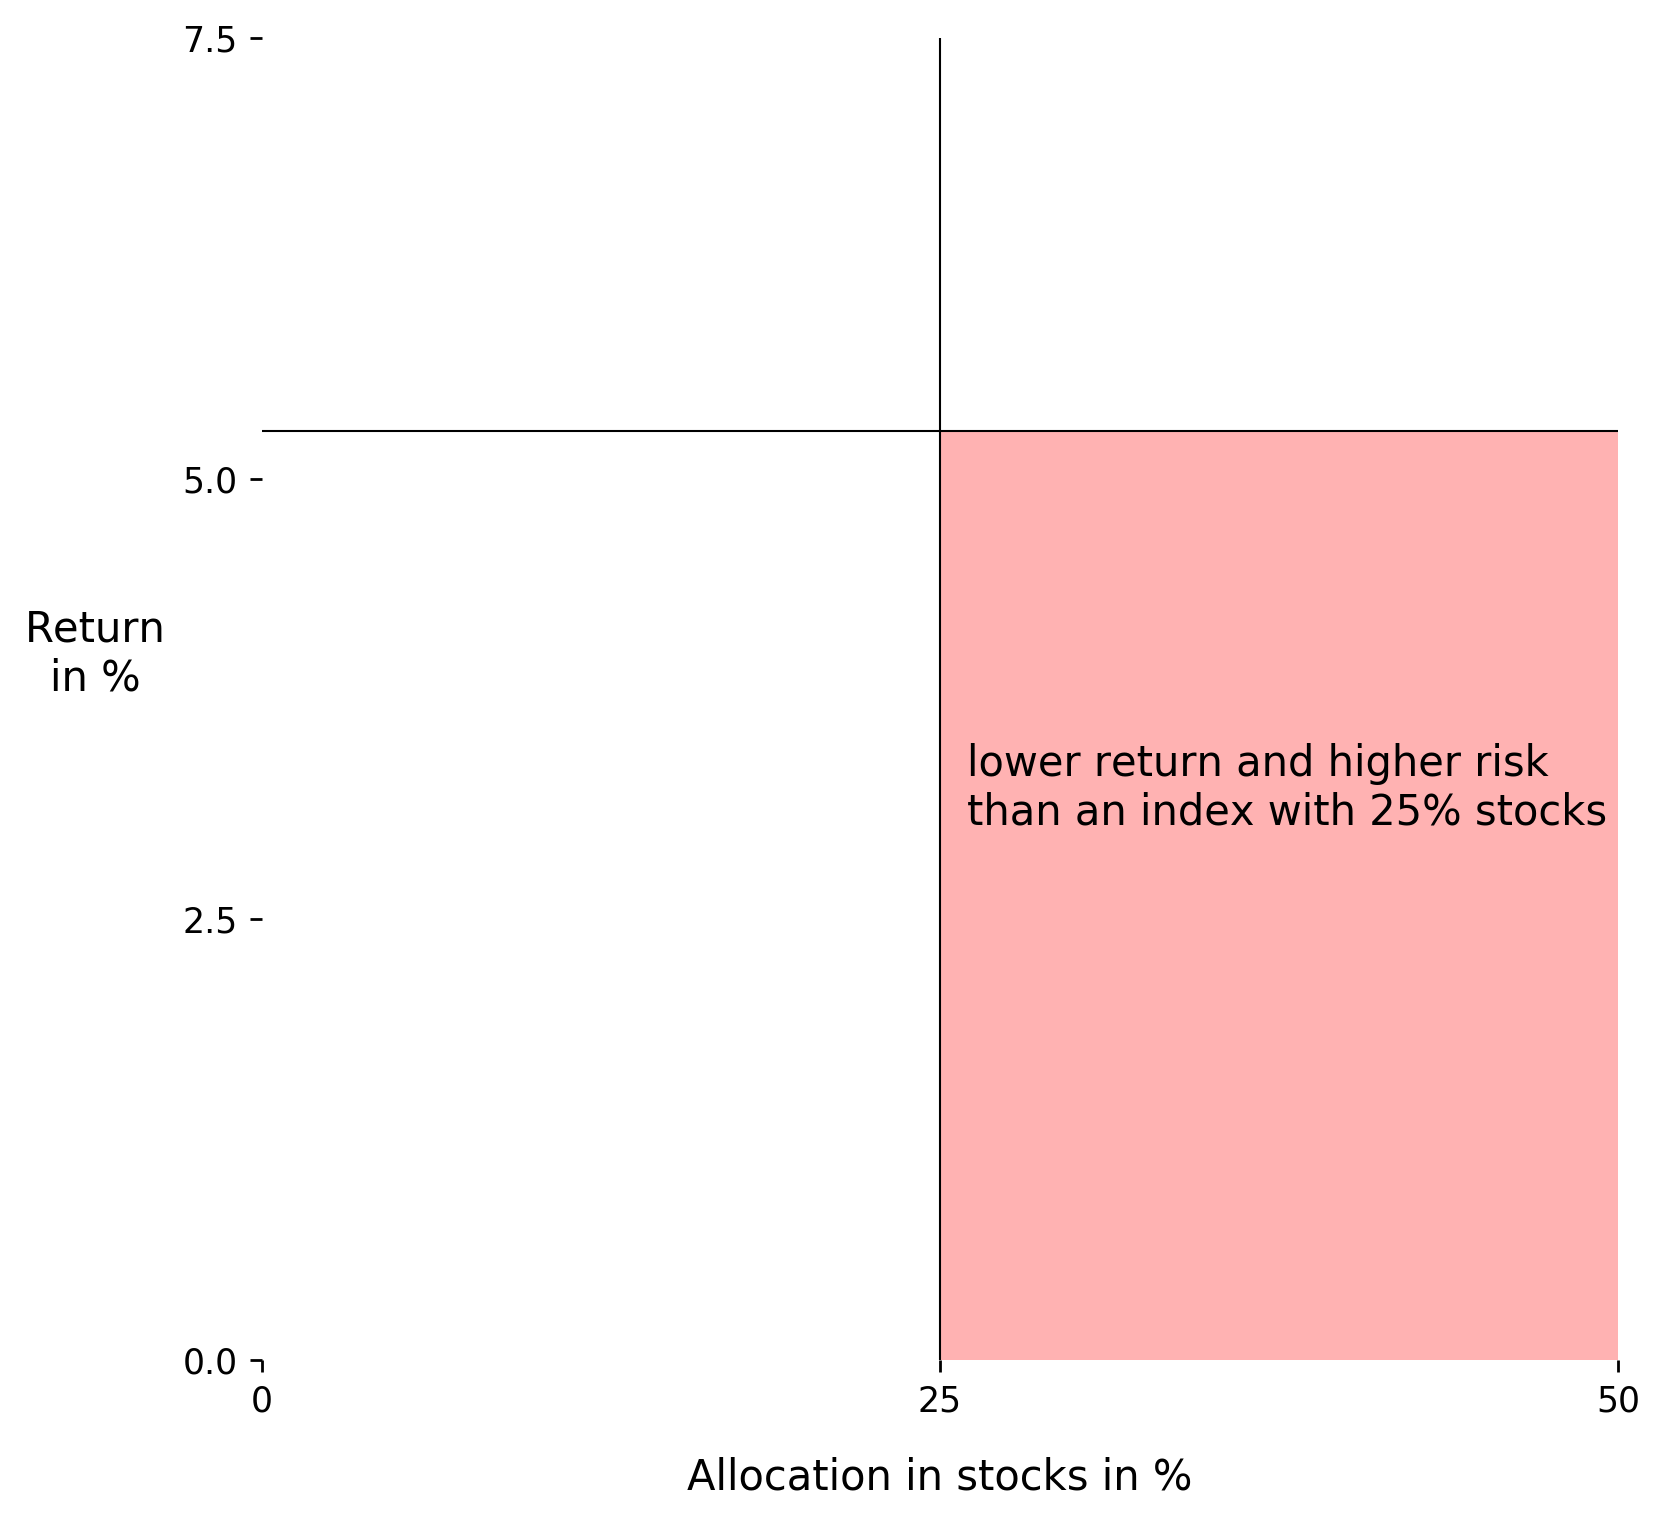

In [294]:
# allocation, returns and fees

y= pf_data_current_with_return.return_2012_2016
x= pf_data_current_with_return.Stocks_2016


index_return = float(df_2016[df_2016["Pension_fund"]\
                       .str.contains("Pictet-Index 25")]\
                       ["return_2012_2016"].astype(float))
    
index_alloc = 25

fig, ax = plt.subplots(figsize=(7,7), dpi=250)


ax.set_xlim(0,50)
ax.set_xticks([0,25,50])

ax.set_ylim(2.5,7)

ax.set_ylabel("Return\nin %", fontsize=12, rotation=0, labelpad = 25)
ax.set_xlabel("Allocation in stocks in %", fontsize=12, labelpad = 11)
#ax.scatter(x, y, color="blue", marker="o", \
#           label = "Pension funds", s=100, alpha=0.5, linewidth=0)

fit = np.polyfit(x, y, deg=1)
x_fit = np.arange(0,51)
y_fit = fit[1] + fit[0]*x_fit
#ax.plot(x_fit, y_fit, color="black", linewidth = 1, label = "Trend line")



ax.plot([0,51], [index_return,index_return], color = "black", linewidth = 0.6, label="Performance and allocation of index")


ax.set_yticks([0,2.5,5,7.5])


for item in ['top','right','bottom','left']:
    ax.spines[item].set_visible(False)
    


ax.fill_between([index_alloc,max(x_fit)], [index_return,index_return], alpha=0.3, color = "red", linewidth=0)
#plt.axhspan(index_return, 7.5, 0, 0.5, facecolor='green', alpha=0.3)

ax.plot([index_alloc,index_alloc], [0,7.5], color = "black", linewidth = 0.6)

ax.text(26, 3.5,\
        "lower return and higher risk \nthan an index with 25% stocks",
        fontsize="12",
        horizontalalignment='left',
        verticalalignment='top')

#ax.text(0.5, 6.5,\
        #"higher return \nand lower risk \nthan an index\nwith 25% stocks",
        #fontsize="12",
        #horizontalalignment='left',
        #verticalalignment='top')

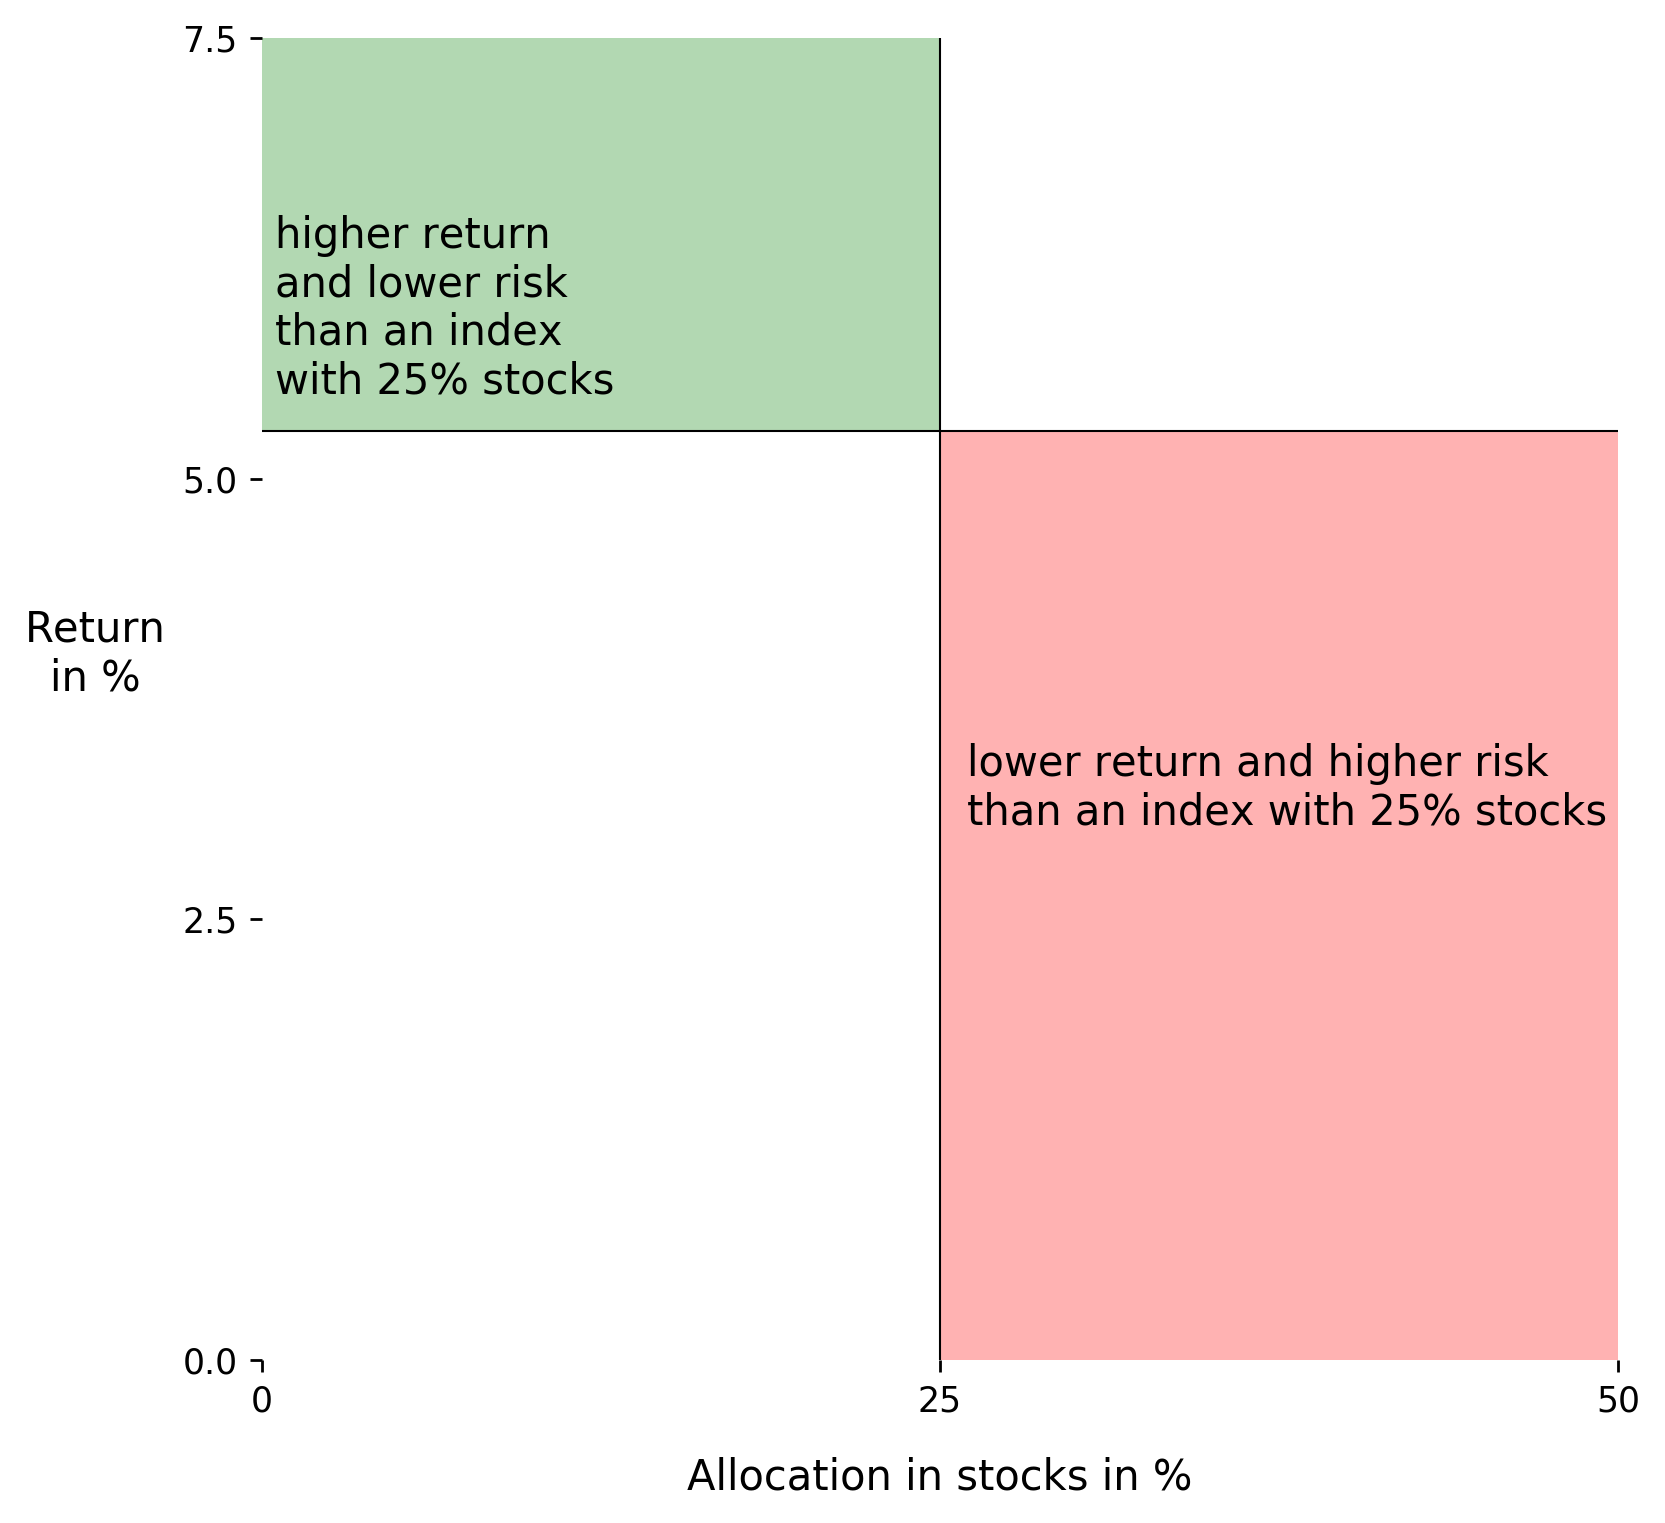

In [209]:
# allocation, returns and fees

y= pf_data_current_with_return.return_2012_2016
x= pf_data_current_with_return.Stocks_2016


index_return = float(df_2016[df_2016["Pension_fund"]\
                       .str.contains("Pictet-Index 25")]\
                       ["return_2012_2016"].astype(float))
    
index_alloc = 25

fig, ax = plt.subplots(figsize=(7,7), dpi=250)


ax.set_xlim(0,50)
ax.set_xticks([0,25,50])

ax.set_ylim(2.5,7)

ax.set_ylabel("Return\nin %", fontsize=12, rotation=0, labelpad = 25)
ax.set_xlabel("Allocation in stocks in %", fontsize=12, labelpad = 11)
#ax.scatter(x, y, color="blue", marker="o", \
#           label = "Pension funds", s=100, alpha=0.5, linewidth=0)

fit = np.polyfit(x, y, deg=1)
x_fit = np.arange(0,51)
y_fit = fit[1] + fit[0]*x_fit
#ax.plot(x_fit, y_fit, color="black", linewidth = 1, label = "Trend line")



ax.plot([0,51], [index_return,index_return], color = "black", linewidth = 0.6, label="Performance and allocation of index")


ax.set_yticks([0,2.5,5,7.5])



ax.legend()
for item in ['top','right','bottom','left']:
    ax.spines[item].set_visible(False)
    
ax.legend().set_visible(False)

ax.fill_between([index_alloc,max(x_fit)], [index_return,index_return], alpha=0.3, color = "red", linewidth=0)
plt.axhspan(index_return, 7.5, 0, 0.5, facecolor='green', alpha=0.3)

ax.plot([index_alloc,index_alloc], [0,7.5], color = "black", linewidth = 0.6)

ax.text(26, 3.5,\
        "lower return and higher risk \nthan an index with 25% stocks",
        fontsize="12",
        horizontalalignment='left',
        verticalalignment='top')

ax.text(0.5, 6.5,\
        "higher return \nand lower risk \nthan an index\nwith 25% stocks",
        fontsize="12",
        horizontalalignment='left',
        verticalalignment='top')

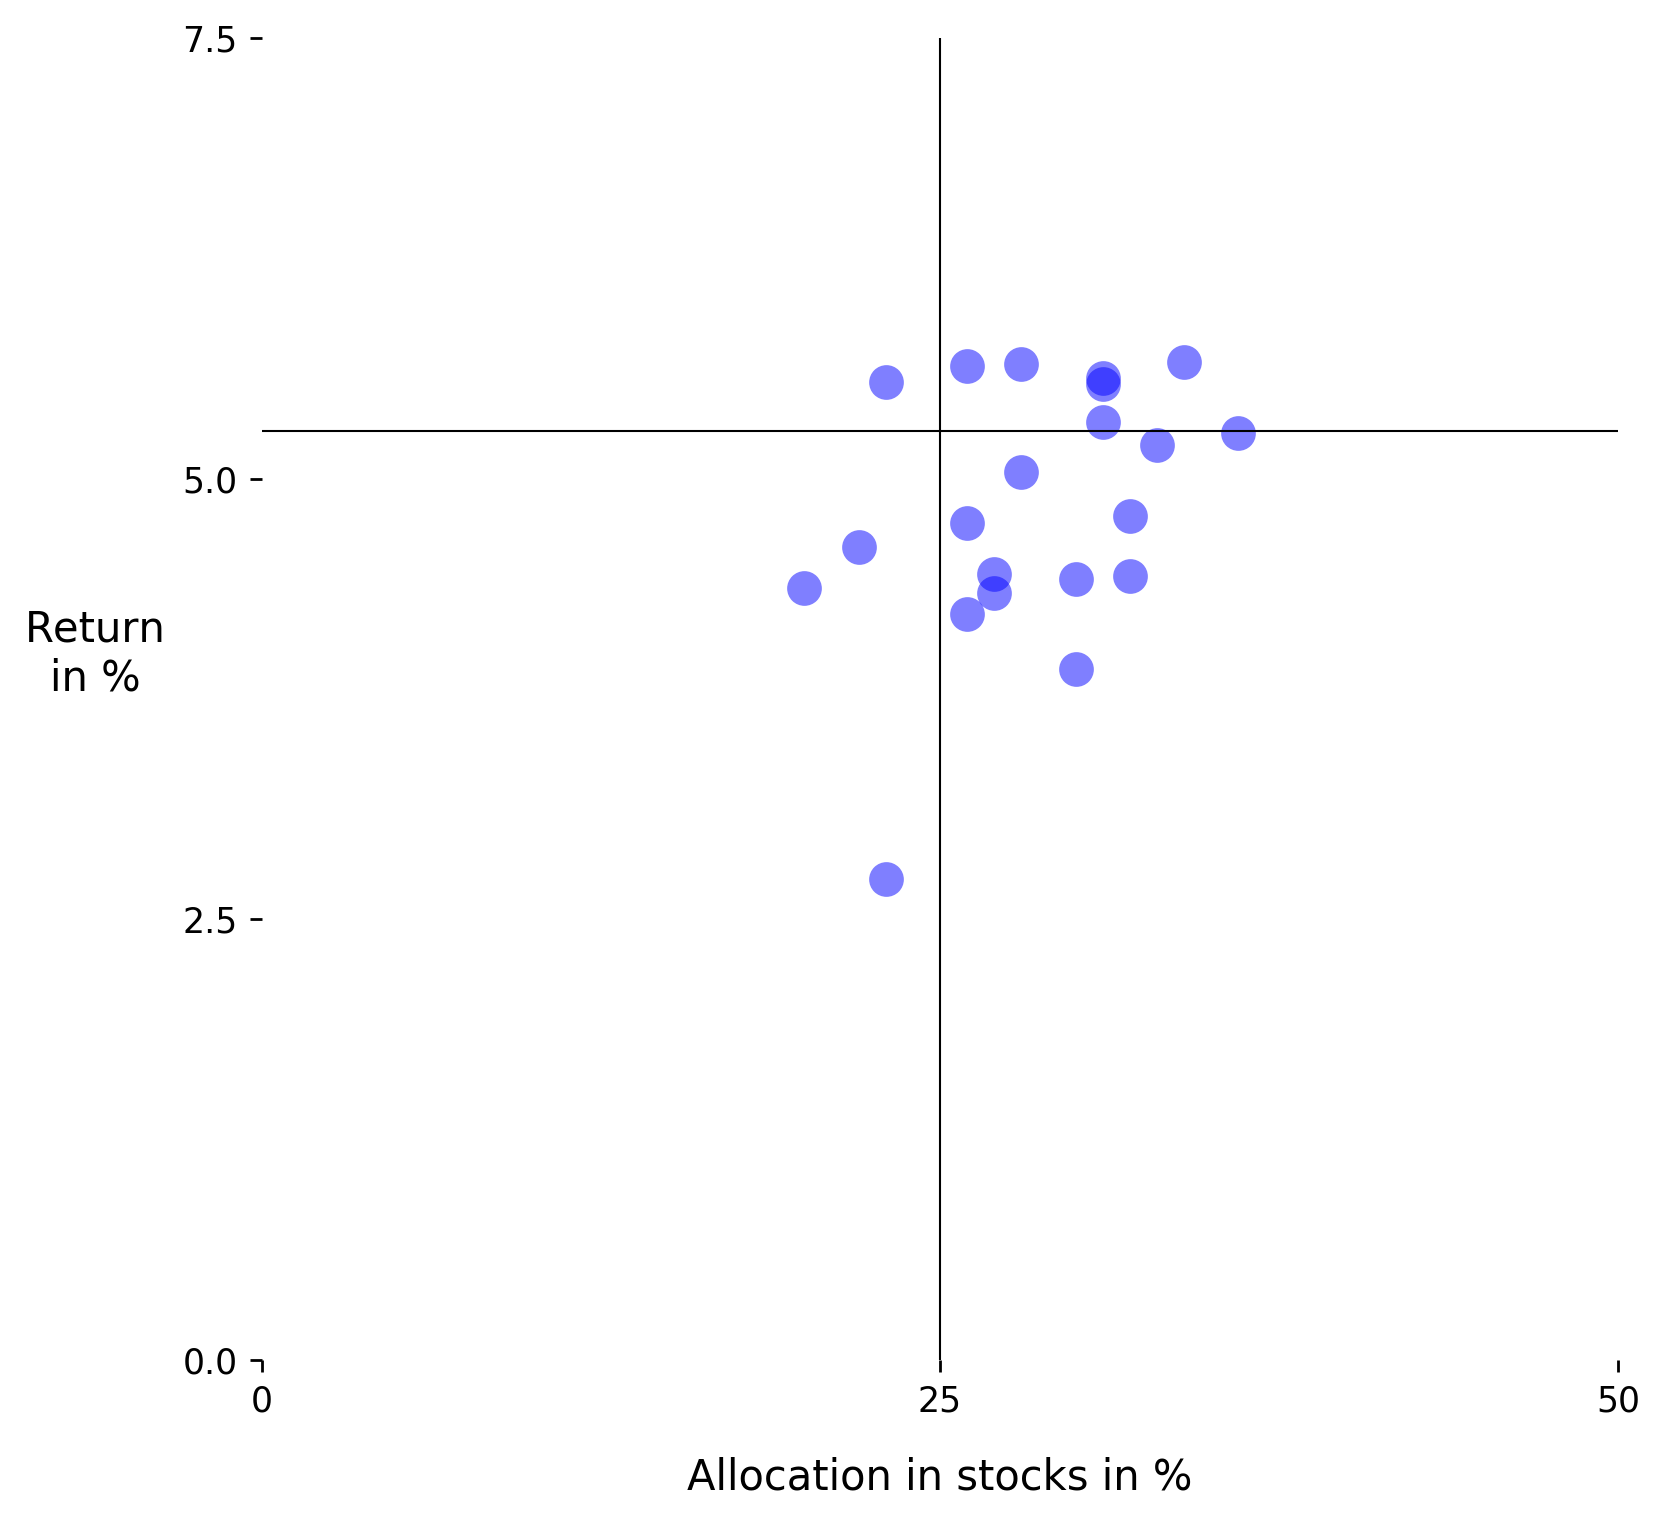

In [193]:
y= pf_data_current_with_return.return_2012_2016
x= pf_data_current_with_return.Stocks_2016


index_return = float(df_2016[df_2016["Pension_fund"]\
                       .str.contains("Pictet-Index 25")]\
                       ["return_2012_2016"].astype(float))
    
index_alloc = 25

fig, ax = plt.subplots(figsize=(7,7), dpi=250)


ax.set_xlim(0,50)
ax.set_xticks([0,25,50])
ax.set_ylim(0,7.5)

ax.set_ylabel("Return\nin %", fontsize=12, rotation=0, labelpad = 25)
ax.set_xlabel("Allocation in stocks in %", fontsize=12, labelpad = 11)

ax.set_yticks([0,2.5,5,7.5])



ax.scatter(x, y, color="blue", marker="o", \
           label = "Pension funds", s=100, alpha=0.5, linewidth=0)

fit = np.polyfit(x, y, deg=1)
x_fit = np.arange(0,50)
y_fit = fit[1] + fit[0]*x_fit
#ax.plot(x_fit, y_fit, color="black", linewidth = 1, label = "Trend line")


ax.legend().set_visible(False)
for item in ['top','right','bottom','left']:
    ax.spines[item].set_visible(False)

ax.plot([0,51], [index_return,index_return], color = "black", linewidth = 0.6, label="Performance and allocation of index")
ax.plot([index_alloc,index_alloc], [0,7.5], color = "black", linewidth = 0.6)


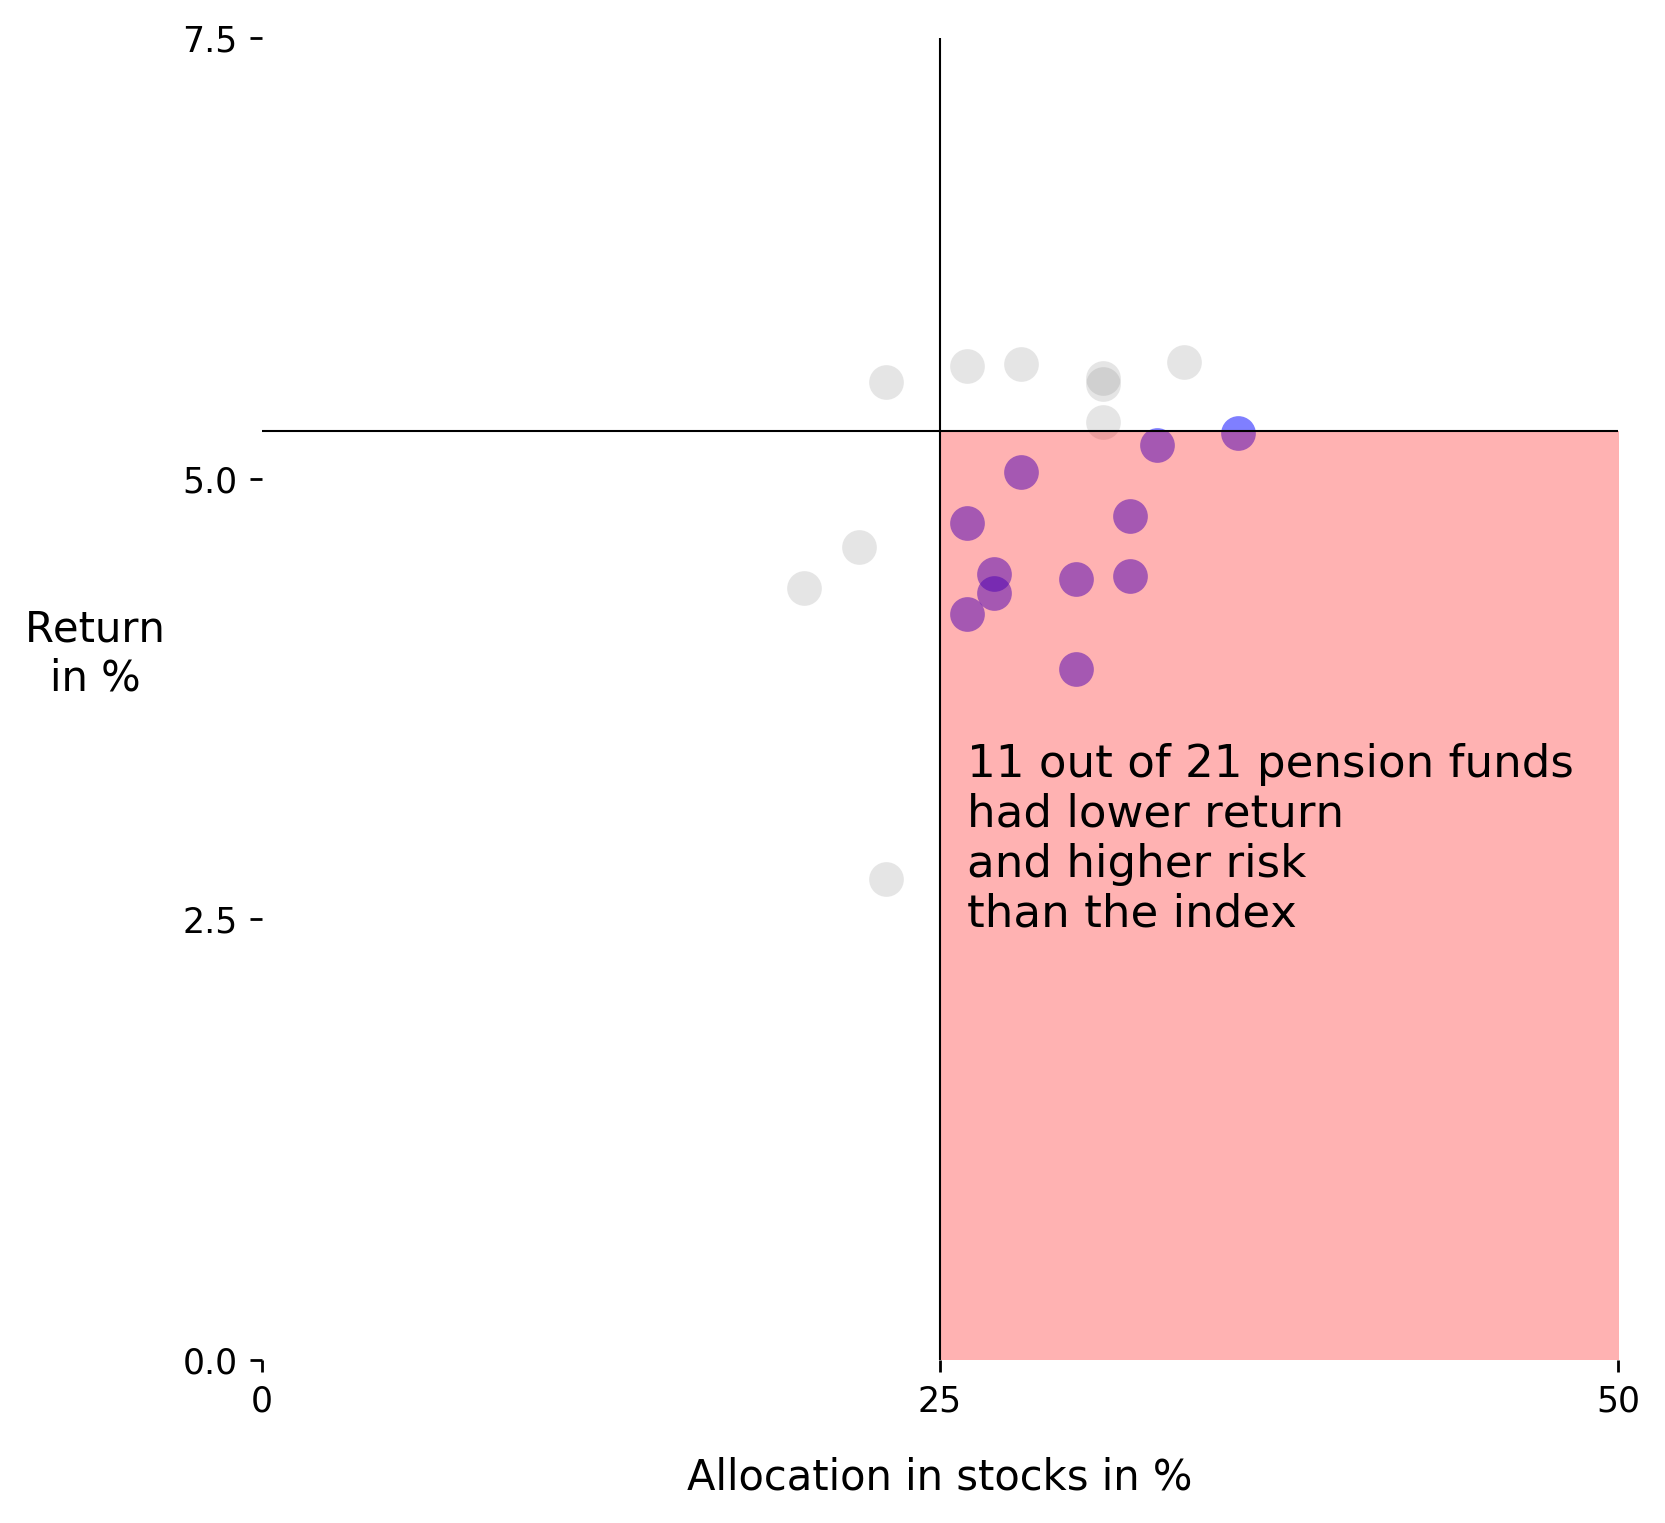

In [297]:
# allocation, returns and fees
# funds with higher than risk and lower return

index_return = float(df_2016[df_2016["Pension_fund"]\
                       .str.contains("Pictet-Index 25")]\
                       ["return_2012_2016"].astype(float))
    
index_alloc = 25

this_data = pf_data_current_with_return\
[(pf_data_current_with_return.return_2012_2016.astype(float) < index_return) &
(pf_data_current_with_return.Stocks_2016.astype(float) > index_alloc)]

this_other_data = pf_data_current_with_return\
[(pf_data_current_with_return.return_2012_2016.astype(float) > index_return) |
(pf_data_current_with_return.Stocks_2016.astype(float) < index_alloc)]

y= this_data.return_2012_2016
x= this_data.Stocks_2016

y2 = this_other_data.return_2012_2016
x2 = this_other_data.Stocks_2016 

fig, ax = plt.subplots(figsize=(7,7), dpi=250)



ax.set_ylim(0,7.5)
ax.set_xlim(0,50)
ax.set_xticks([0,25,50])

ax.set_ylabel("Return\nin %", fontsize=12, rotation=0, labelpad = 25)
ax.set_xlabel("Allocation in stocks in %", fontsize=12, labelpad = 11)

ax.set_yticks([0,2.5,5,7.5])

ax.scatter(x, y, color="blue", marker="o", \
           label = "Pension funds", s = 100, alpha=0.5, linewidth=0)

ax.scatter(x2, y2, color="grey", marker="o", \
           s = 100, alpha=0.2, linewidth=0)

ax.text(26, 3.5,\
        "11 out of 21 pension funds\nhad lower return\nand higher risk \nthan the index",
        fontsize="13",
        horizontalalignment='left',
        verticalalignment='top')

ax.fill_between([index_alloc,51], [index_return,index_return], alpha=0.3, color = "red", linewidth=0)


ax.plot([0,51], [index_return,index_return], color = "black", linewidth = 0.6, label="Performance and allocation of index")
ax.plot([index_alloc,index_alloc], [0,7.5], color = "black", linewidth = 0.6)

for item in ['top','right','bottom','left']:
    ax.spines[item].set_visible(False)

ax.legend().set_visible(False)

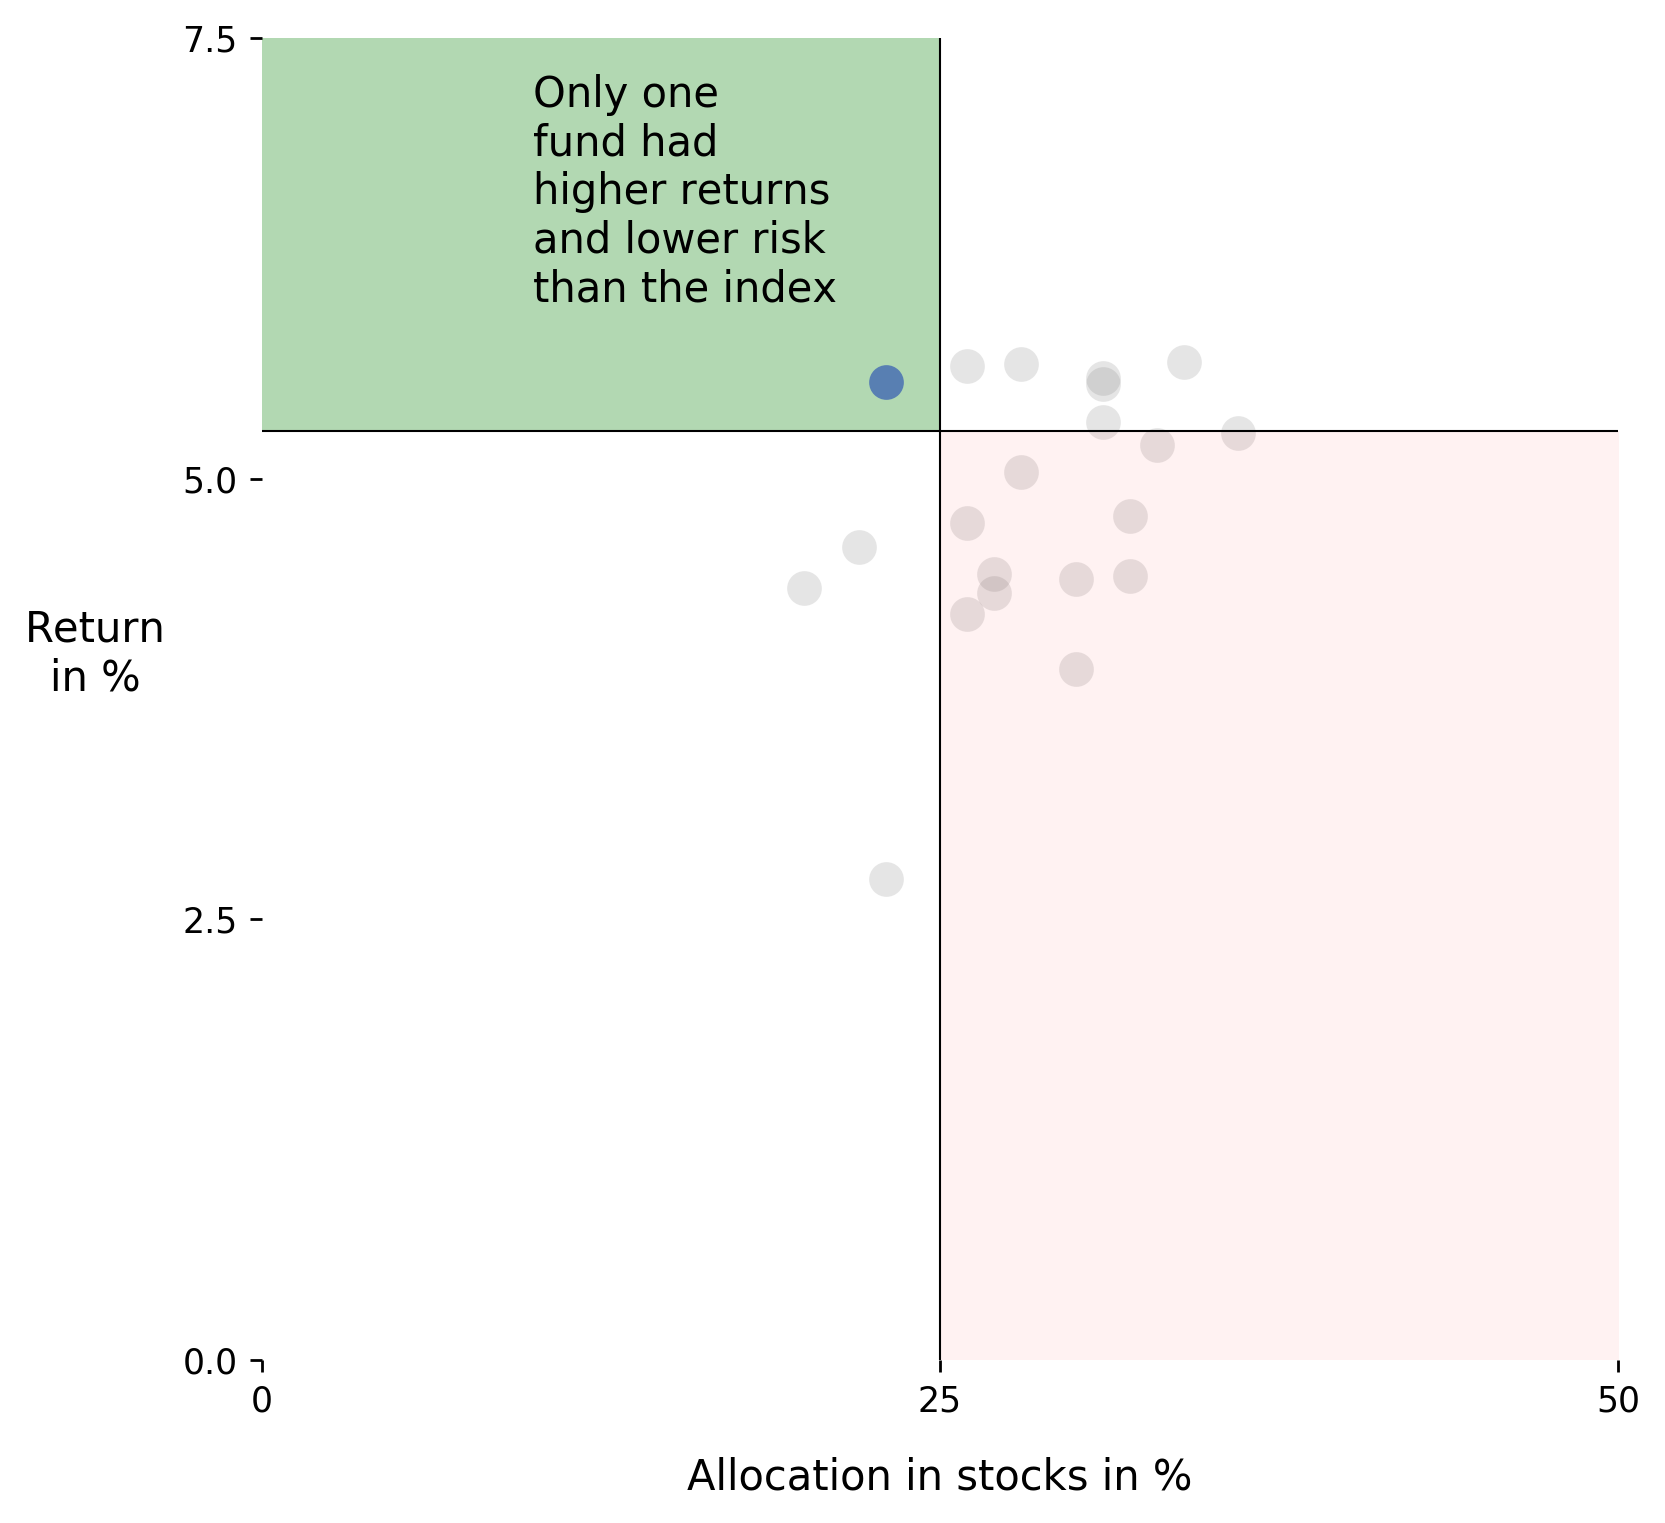

In [299]:
# allocation, returns and fees
# funds with higher than risk and lower return

index_return = float(df_2016[df_2016["Pension_fund"]\
                       .str.contains("Pictet-Index 25")]\
                       ["return_2012_2016"].astype(float))
    
index_alloc = 25

this_data = pf_data_current_with_return\
[(pf_data_current_with_return.return_2012_2016.astype(float) > index_return) &
(pf_data_current_with_return.Stocks_2016.astype(float) < index_alloc)]

this_other_data = pf_data_current_with_return\
[(pf_data_current_with_return.return_2012_2016.astype(float) < index_return) |
(pf_data_current_with_return.Stocks_2016.astype(float) > index_alloc)]

y= this_data.return_2012_2016
x= this_data.Stocks_2016

y2 = this_other_data.return_2012_2016
x2 = this_other_data.Stocks_2016 

fig, ax = plt.subplots(figsize=(7,7), dpi=250)


ax.set_xlim(0,50)
ax.set_xticks([0,25,50])
ax.set_ylim(0,7.5)

ax.set_ylabel("Return\nin %", fontsize=12, rotation=0, labelpad = 25)
ax.set_xlabel("Allocation in stocks in %", fontsize=12, labelpad = 11)

ax.set_yticks([0,2.5,5,7.5])

ax.scatter(x, y, color="blue", marker="o", \
           label = "Pension funds", s = 100, alpha=0.5, linewidth=0)

ax.scatter(x2, y2, color="grey", marker="o", \
           s = 100, alpha=0.2, linewidth=0)

ax.text(10, 7.3,\
        "Only one\nfund had\nhigher returns\nand lower risk\nthan the index",
        fontsize="12",
        horizontalalignment='left',
        verticalalignment='top')

plt.axhspan(index_return, 7.5, 0, 0.5, facecolor='green', alpha=0.3)

ax.plot([0,51], [index_return,index_return], color = "black", linewidth = 0.6, label="Performance and allocation of index")
ax.plot([index_alloc,index_alloc], [0,7.5], color = "black", linewidth = 0.6)

ax.fill_between([index_alloc,51], [index_return,index_return], alpha=0.05, color = "red", linewidth=0)


for item in ['top','right','bottom','left']:
    ax.spines[item].set_visible(False)

ax.legend().set_visible(False)

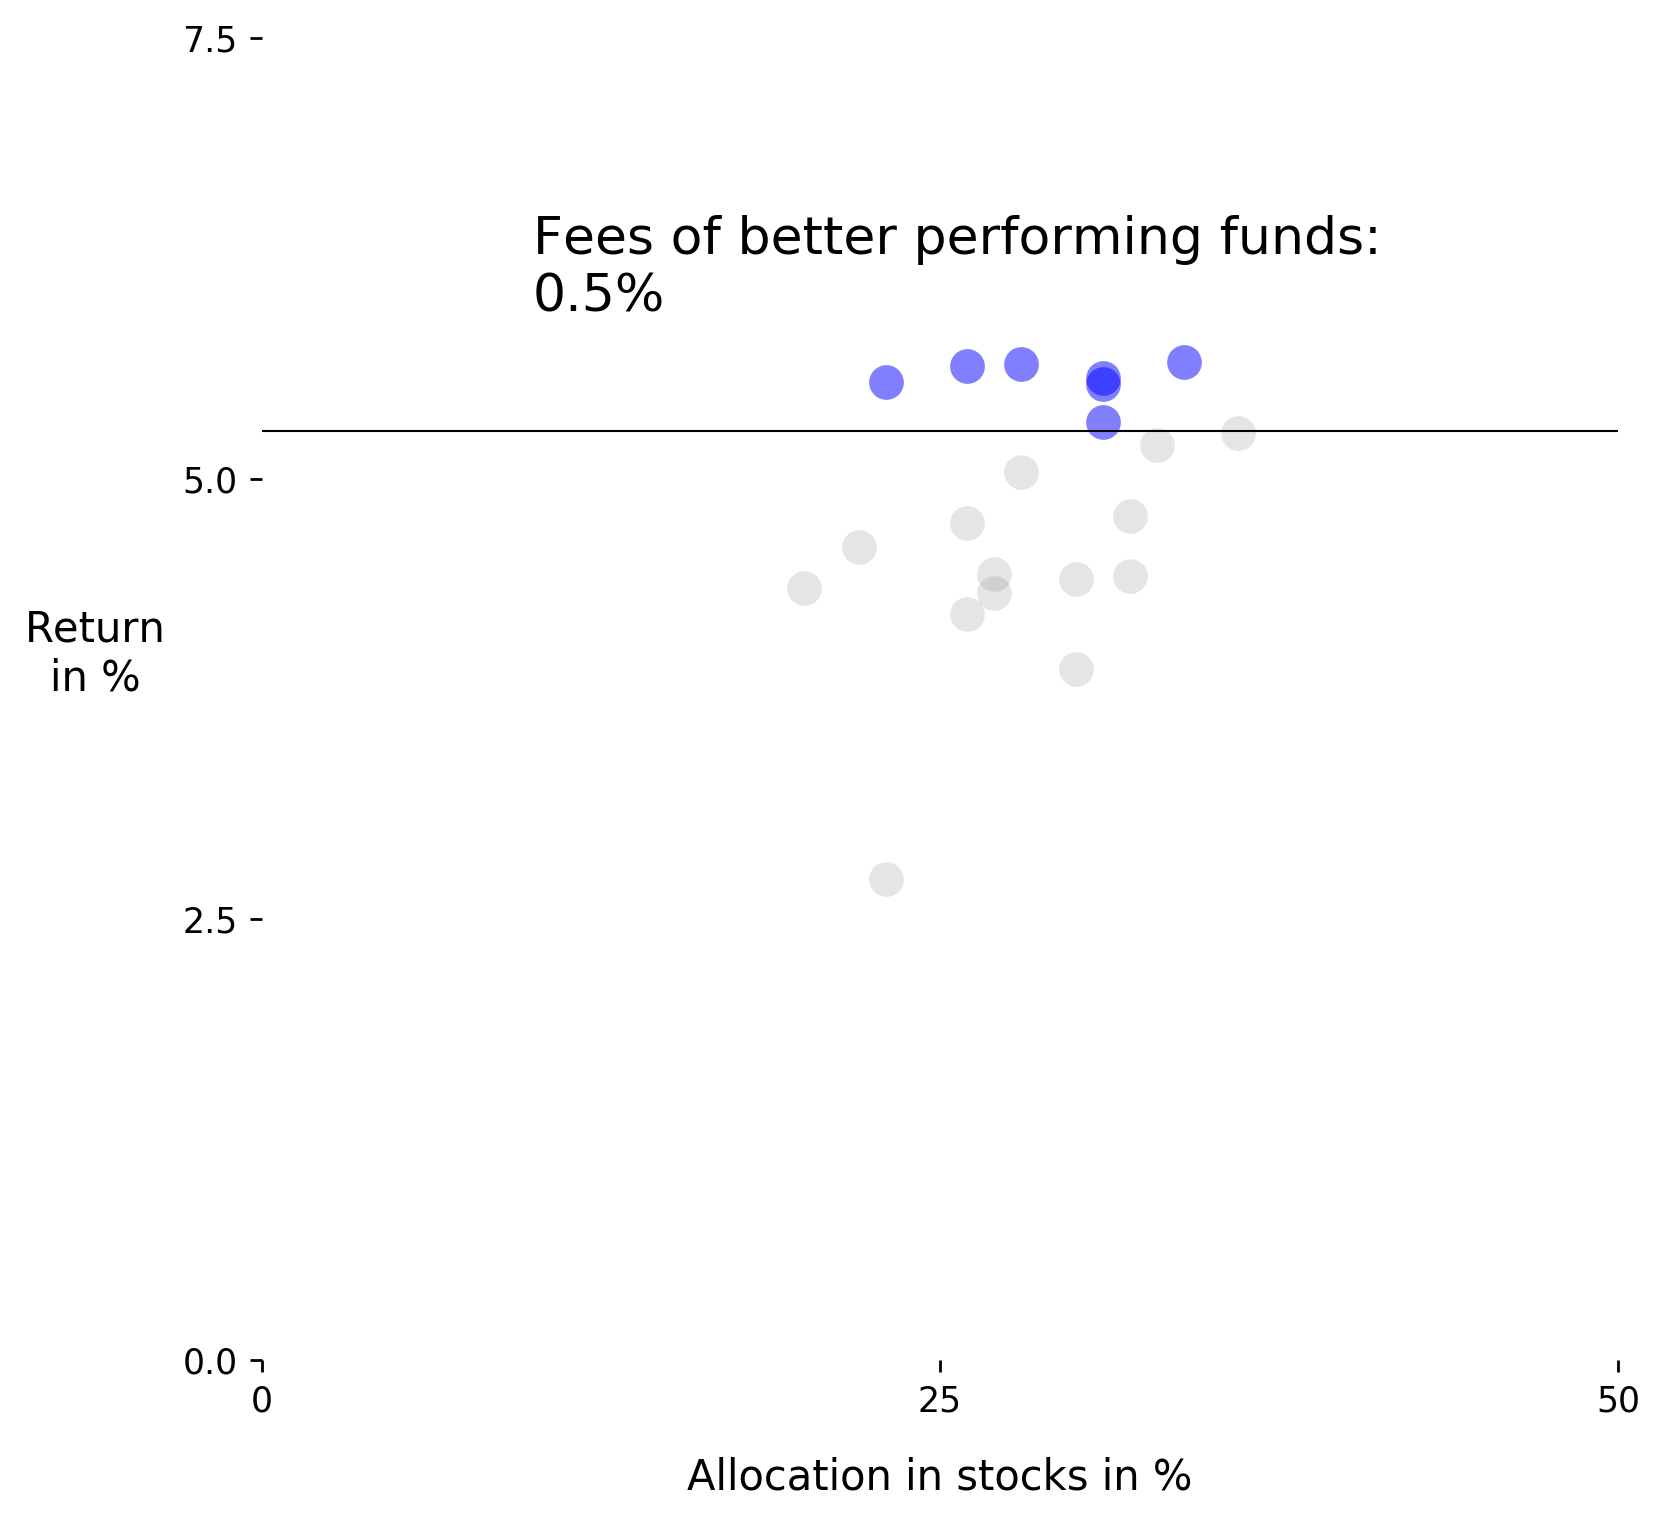

In [305]:
y= pf_data_current_with_return.return_2012_2016
x= pf_data_current_with_return.Stocks_2016


index_return = float(df_2016[df_2016["Pension_fund"]\
                       .str.contains("Pictet-Index 25")]\
                       ["return_2012_2016"].astype(float))
    
index_alloc = 25

fig, ax = plt.subplots(figsize=(7,7), dpi=250)


ax.set_xlim(0,50)
ax.set_xticks([0,25,50])
ax.plot([0,51], [index_return,index_return], color = "black", linewidth = 0.6, label="Performance and allocation of index")

ax.set_ylim(2.5,7)

ax.set_ylabel("Return\nin %", fontsize=12, rotation=0, labelpad = 25)
ax.set_xlabel("Allocation in stocks in %", fontsize=12, labelpad = 11)

ax.set_yticks([0,2.5,5,7.5])

this_data1 = pf_data_current_with_return\
[(pf_data_current_with_return.return_2012_2016.astype(float) > index_return)]
this_data2 = pf_data_current_with_return\
[(pf_data_current_with_return.return_2012_2016.astype(float) < index_return)]

y1= this_data1.return_2012_2016
x1= this_data1.Stocks_2016
y2= this_data2.return_2012_2016
x2= this_data2.Stocks_2016


ax.scatter(x1, y1, color="blue", marker="o", \
           label = "Pension funds", s=100, alpha=0.5, linewidth=0)
ax.scatter(x2, y2, color="grey", marker="o", \
           label = "Pension funds", s=100, alpha=0.2, linewidth=0)

fit = np.polyfit(x, y, deg=1)
x_fit = np.arange(0,50)
y_fit = fit[1] + fit[0]*x_fit
#ax.plot(x_fit, y_fit, color="black", linewidth = 1, label = "Trend line")


ax.text(10, 6.5,\
        "Fees of better performing funds:\n"+ mean_costs1 +"%",
        fontsize="15",
        horizontalalignment='left',
        verticalalignment='top')

mean_costs1 = str(round(this_data1.TER_2016.mean(),1))

mean_costs2 = str(round(this_data2.TER_2016.mean(),1))



#ax.text(26, 3.5,\
        #"Fees of worse performing funds:\n"+ mean_costs2 +"%",
        #fontsize="16",
        #horizontalalignment='left',
        #verticalalignment='top')


ax.legend().set_visible(False)
for item in ['top','right','bottom','left']:
    ax.spines[item].set_visible(False)


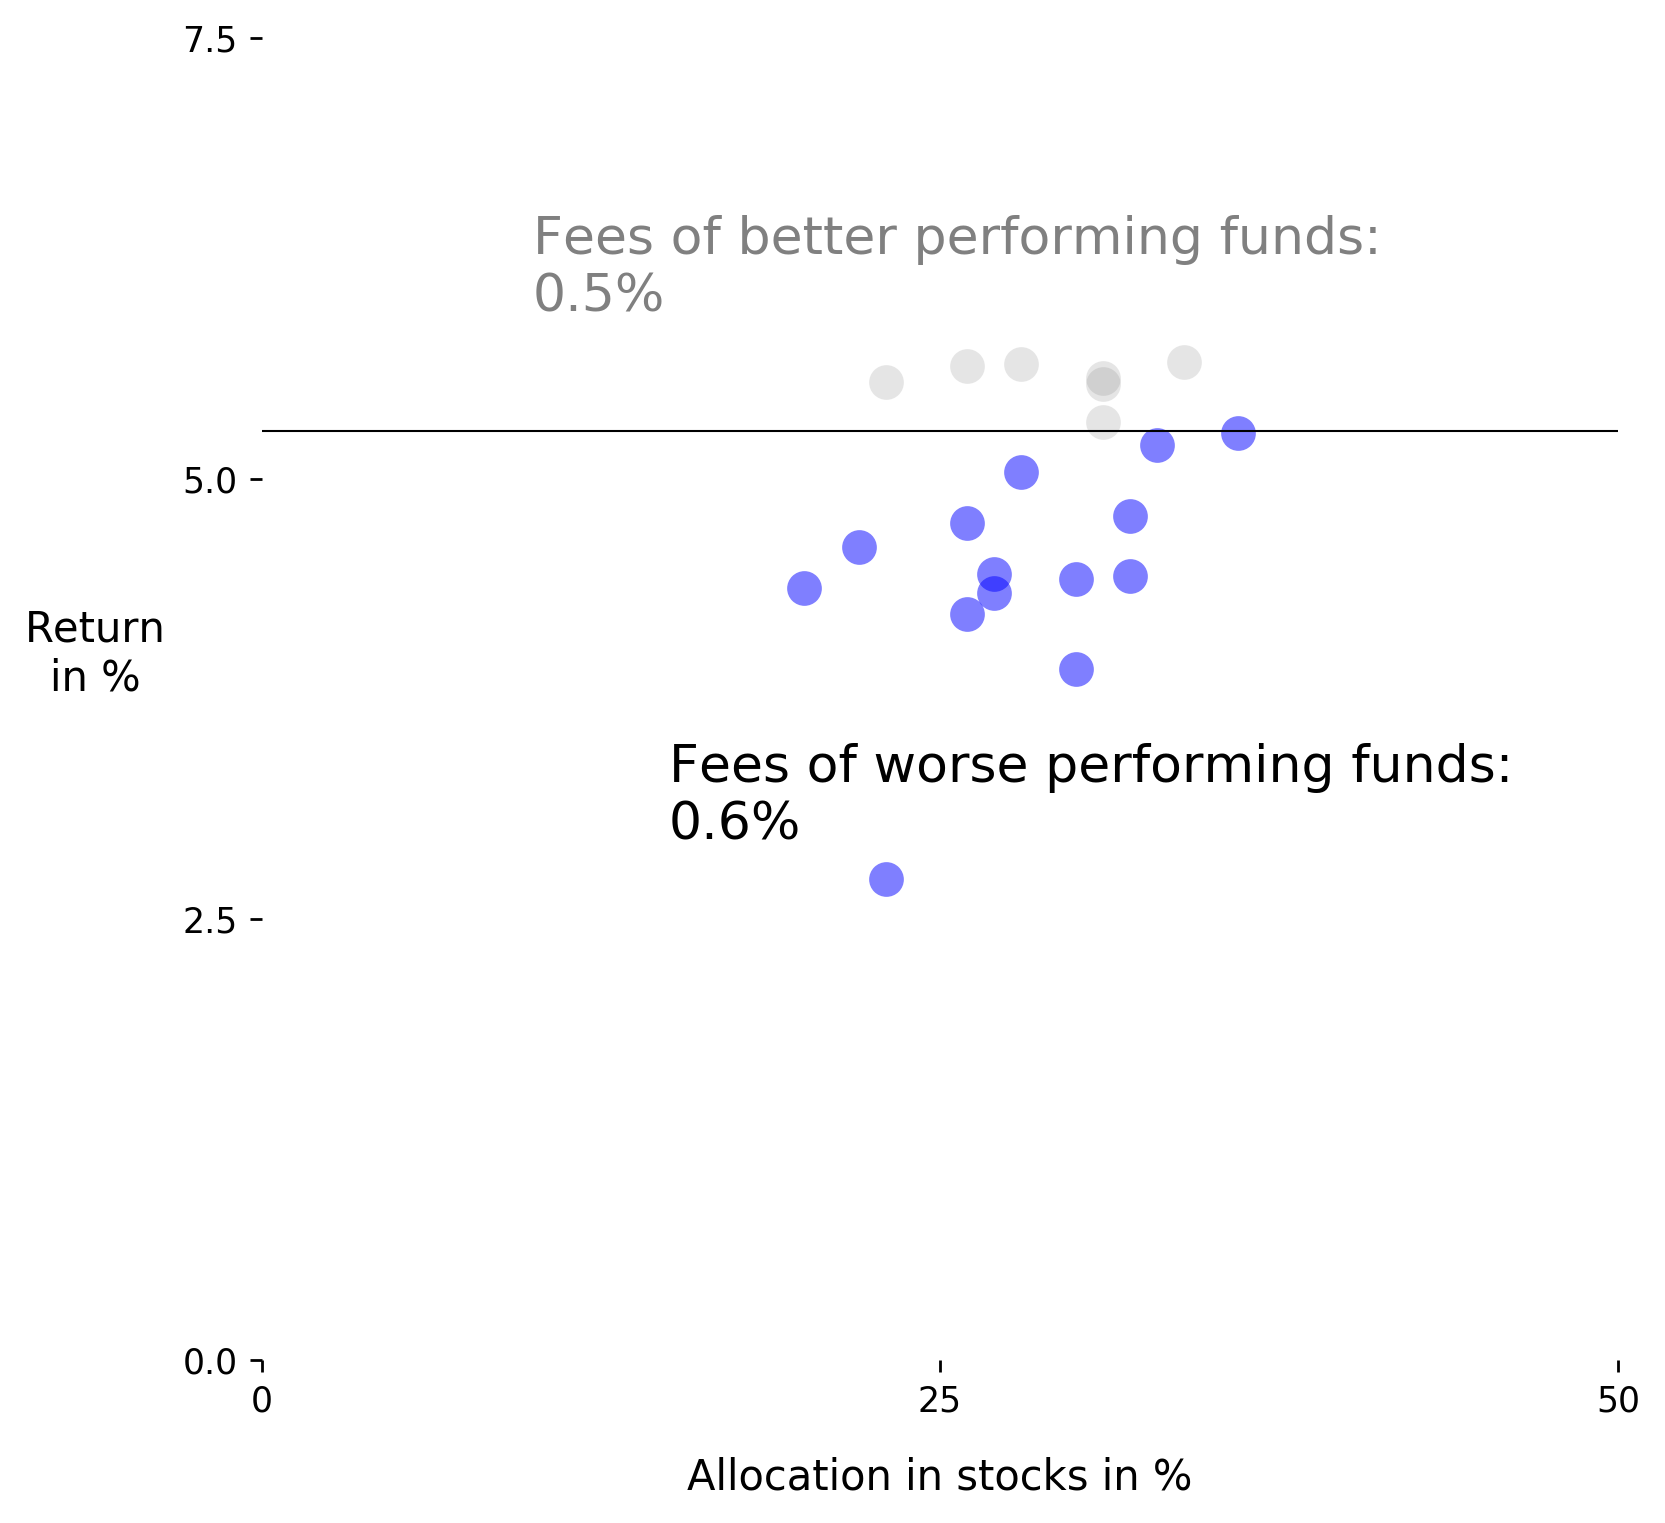

In [307]:
y= pf_data_current_with_return.return_2012_2016
x= pf_data_current_with_return.Stocks_2016


index_return = float(df_2016[df_2016["Pension_fund"]\
                       .str.contains("Pictet-Index 25")]\
                       ["return_2012_2016"].astype(float))
    
index_alloc = 25

fig, ax = plt.subplots(figsize=(7,7), dpi=250)


ax.set_xlim(0,50)
ax.set_xticks([0,25,50])
ax.set_ylim(2.5,7)

ax.set_ylabel("Return\nin %", fontsize=12, rotation=0, labelpad = 25)
ax.set_xlabel("Allocation in stocks in %", fontsize=12, labelpad = 11)

ax.set_yticks([0,2.5,5,7.5])

this_data1 = pf_data_current_with_return\
[(pf_data_current_with_return.return_2012_2016.astype(float) > index_return)]
this_data2 = pf_data_current_with_return\
[(pf_data_current_with_return.return_2012_2016.astype(float) < index_return)]

y1= this_data1.return_2012_2016
x1= this_data1.Stocks_2016
y2= this_data2.return_2012_2016
x2= this_data2.Stocks_2016


ax.scatter(x2, y2, color="blue", marker="o", \
           label = "Pension funds", s=100, alpha=0.5, linewidth=0)
ax.scatter(x1, y1, color="grey", marker="o", \
           label = "Pension funds", s=100, alpha=0.2, linewidth=0)

fit = np.polyfit(x, y, deg=1)
x_fit = np.arange(0,50)
y_fit = fit[1] + fit[0]*x_fit
#ax.plot(x_fit, y_fit, color="black", linewidth = 1, label = "Trend line")



ax.plot([0,51], [index_return,index_return], color = "black", linewidth = 0.6, label="Performance and allocation of index")

mean_costs1 = str(round(this_data1.TER_2016.mean(),1))

mean_costs2 = str(round(this_data2.TER_2016.mean(),1))

ax.text(10, 6.5,\
        "Fees of better performing funds:\n"+ mean_costs1 +"%",
        fontsize="15",
        color = 'grey',
        horizontalalignment='left',
        verticalalignment='top')



ax.text(15, 3.5,\
        "Fees of worse performing funds:\n"+ mean_costs2 +"%",
        fontsize="15",
        horizontalalignment='left',
        verticalalignment='top')


ax.legend().set_visible(False)
for item in ['top','right','bottom','left']:
    ax.spines[item].set_visible(False)


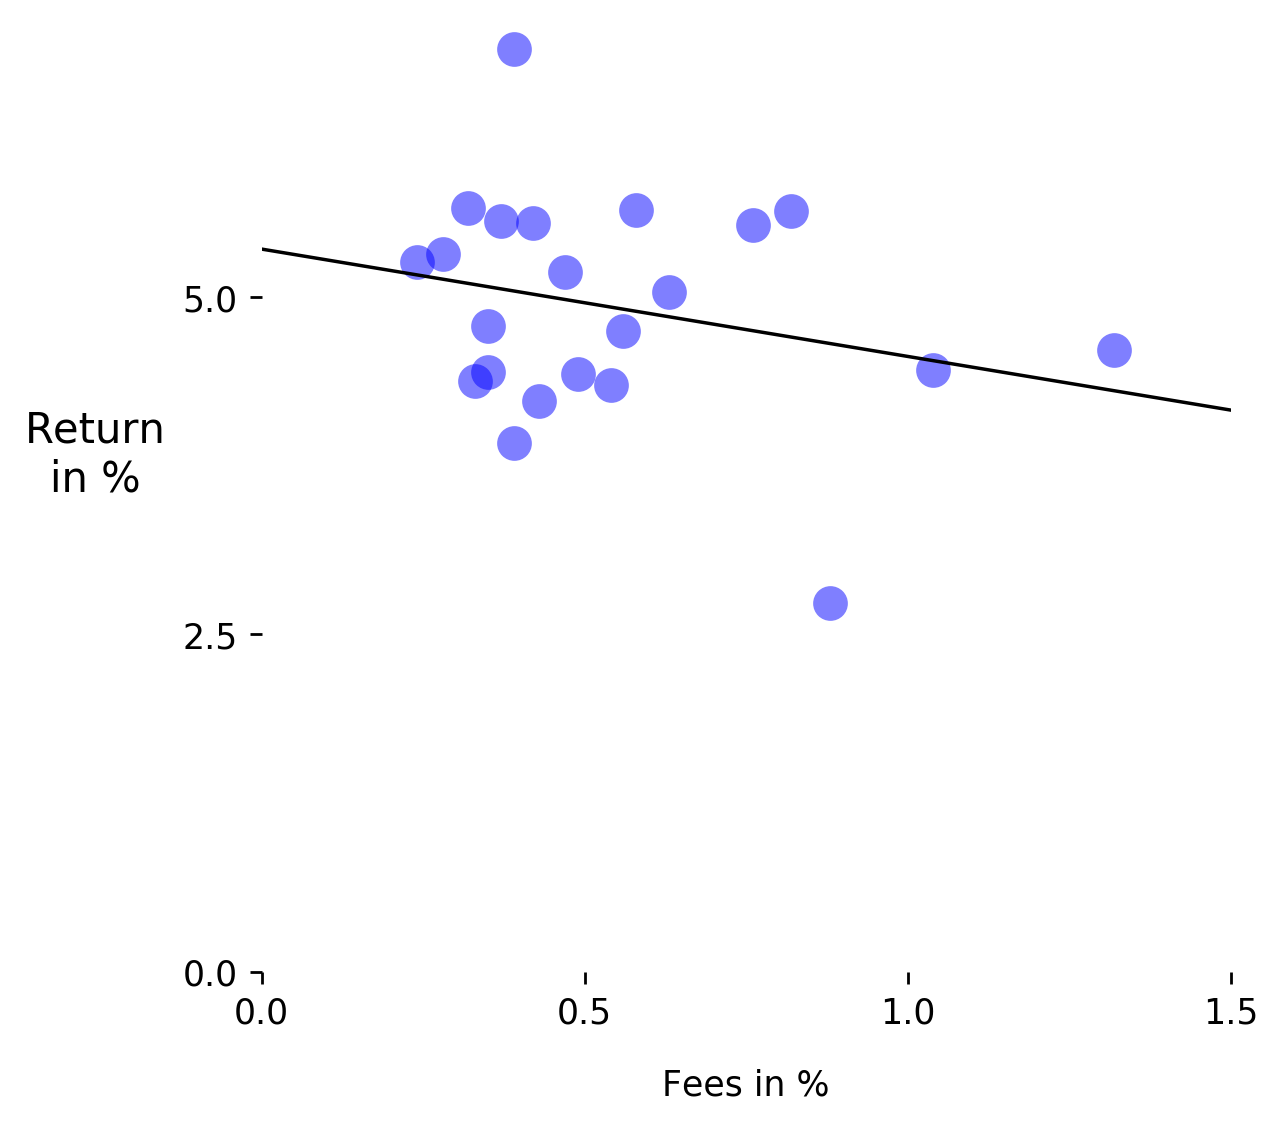

In [309]:
# compare costs and returns

#use only data with 2012 - 2016 returns
pf_data_current_with_return = pf_data_current[~pf_data_current.return_2012_2016.isnull()]

y= pf_data_current_with_return.return_2012_2016
x= pf_data_current_with_return.TER_2016
fig, ax = plt.subplots(figsize=(5,5), dpi=250)
fit = np.polyfit(x, y, deg=1)
ax.set_xlim(0,1.4)
ax.set_ylim(2.5,7)


ax.plot(x_fit, y_fit, color="black", linewidth = 1, label = "Trend line")


ax.scatter(x, y, color="blue", marker="o", \
           label = "Pension funds", s=100, alpha=0.5, linewidth=0)

ax.set_ylabel("Return\nin %", fontsize=12, rotation=0, labelpad = 25)
ax.set_yticks([0,2.5,5])

x_fit = np.arange(0,50)
y_fit = fit[1] + fit[0]*x_fit

ax.set_xlabel("Fees in %", labelpad = 11)
ax.set_xticks([0,0.5,1,1.5])

ax.legend().set_visible(False)
for item in ['top','right','bottom','left']:
    ax.spines[item].set_visible(False)

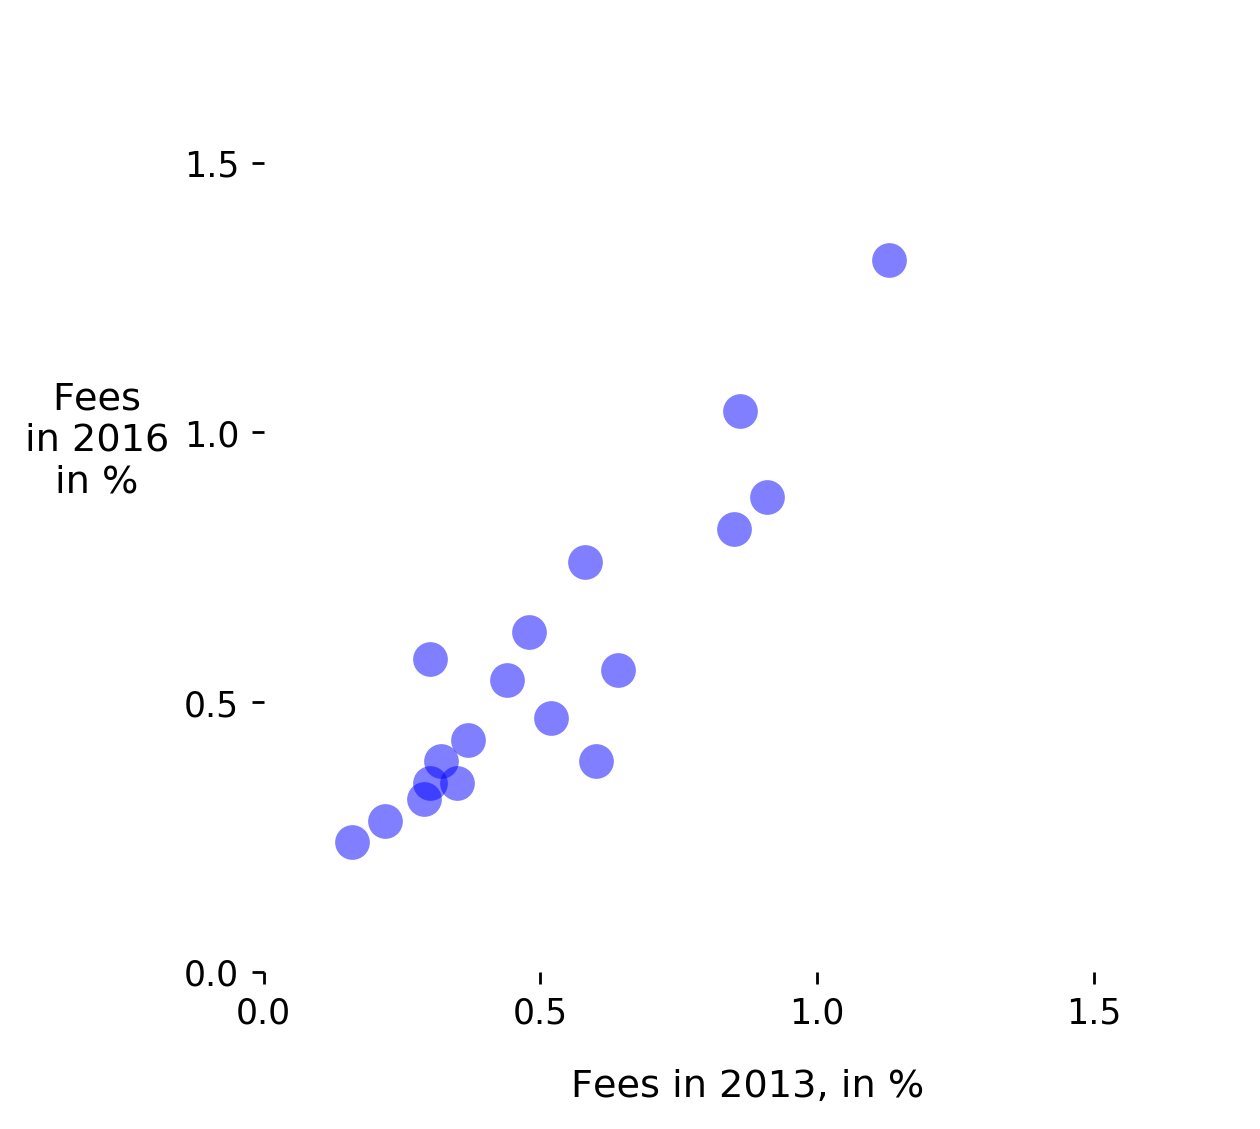

In [313]:
# compare cost changes
x= pf_data_historic.TER_2013
y= pf_data_historic.TER_2016
fig, ax = plt.subplots(figsize=(5,5), dpi=250)
fit = np.polyfit(x, y, deg=1)
ax.set_xlim(0,1.75)
ax.set_ylim(0,1.75)
ax.set_ylabel("Fees\nin 2016\nin %", fontsize=11, rotation=0, labelpad = 25)
ax.set_xlabel("Fees in 2013, in %", fontsize=11, labelpad = 11)
ax.set_xticks([0,0.5,1,1.5])
ax.set_yticks([0,0.5,1,1.5])

ax.scatter(x, y, color="blue", marker="o", label = "Pension funds", s=100, alpha=0.5, linewidth= 0)
x_fit = np.arange(0,56)
y_fit = fit[1] + fit[0]*x_fit
#ax.plot(x_fit, x_fit, color="black", linewidth = 0.7)
ax.legend().set_visible(False)
for item in ['top','right','bottom','left']:
    ax.spines[item].set_visible(False)

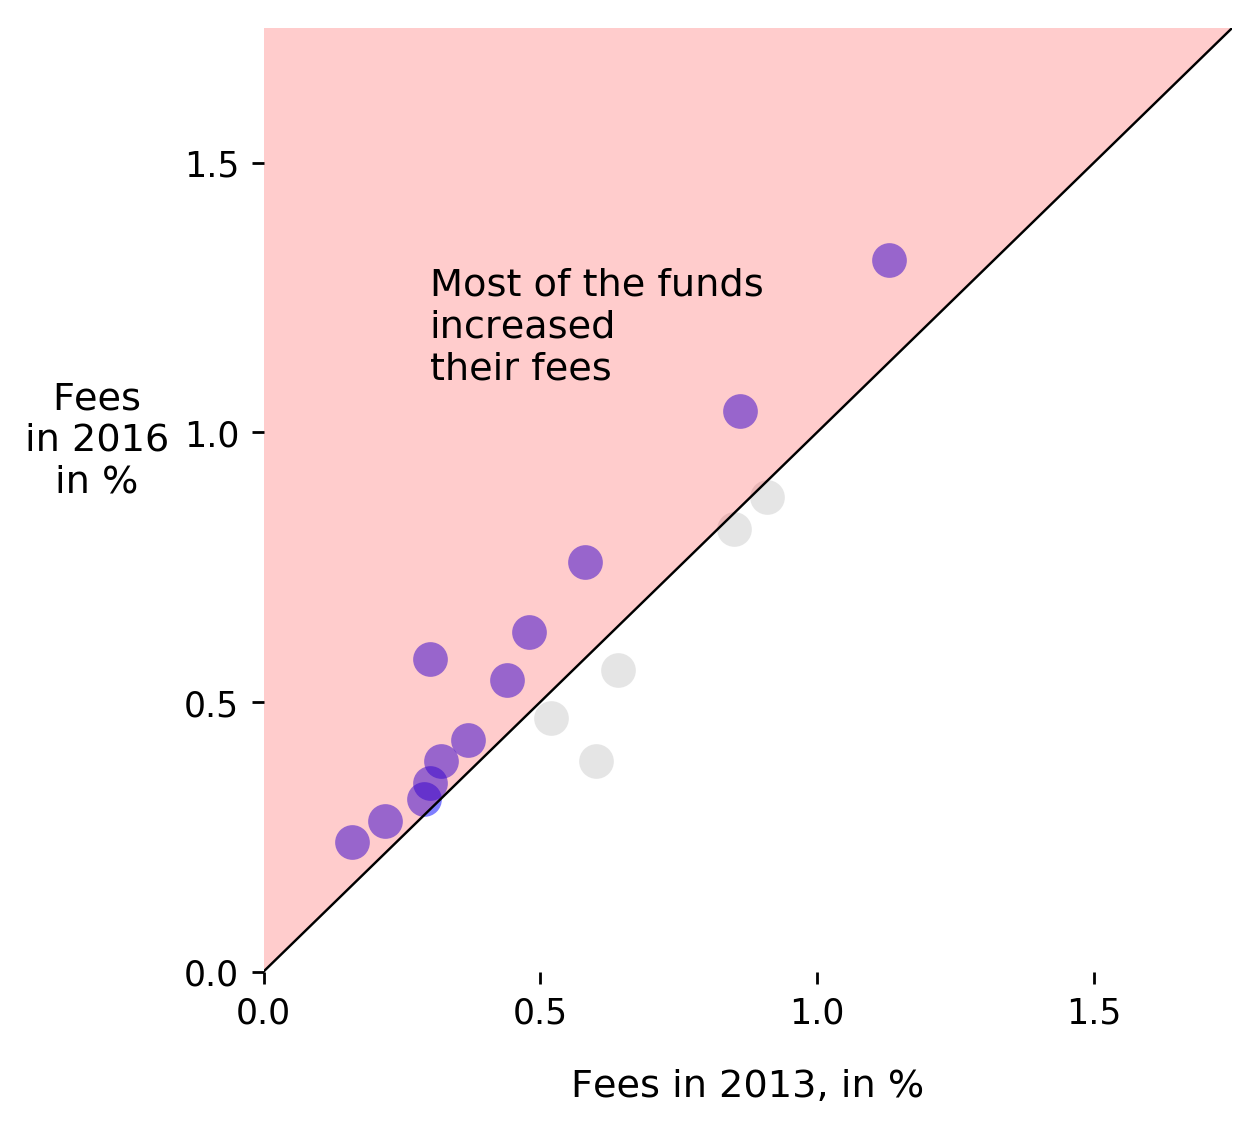

In [326]:
# compare cost changes

this_data = pf_data_historic[pf_data_historic.TER_2016 - pf_data_historic.TER_2013 > 0]
other_data  = pf_data_historic[pf_data_historic.TER_2016 - pf_data_historic.TER_2013 < 0]

x1= this_data.TER_2013
y1= this_data.TER_2016
# compare cost changes
x2= other_data.TER_2013
y2= other_data.TER_2016
fig, ax = plt.subplots(figsize=(5,5), dpi=250)
fit = np.polyfit(x, y, deg=1)
ax.set_xlim(0,1.75)
ax.set_ylim(0,1.75)
ax.set_ylabel("Fees\nin 2016\nin %", fontsize=11, rotation=0, labelpad = 25)
ax.set_xlabel("Fees in 2013, in %", fontsize=11, labelpad = 11)
ax.set_xticks([0,0.5,1,1.5])
ax.set_yticks([0,0.5,1,1.5])

ax.scatter(x1, y1, color="blue", marker="o", label = "Pension funds", s=100, alpha=0.5, linewidth= 0)
ax.scatter(x2, y2, color="grey", marker="o", label = "Pension funds", s=100, alpha=0.2, linewidth= 0)

x_fit = np.arange(0,56)
y_fit = fit[1] + fit[0]*x_fit
ax.plot(x_fit, x_fit, color="black", linewidth = 0.7)
ax.legend().set_visible(False)

for item in ['top','right','bottom','left']:
    ax.spines[item].set_visible(False)

ax.fill_between([0,2], [0,2], [2,3], alpha=0.2, color = "red", linewidth=0)
ax.text(0.3,1.1,"Most of the funds\nincreased\ntheir fees",
       fontsize='11')

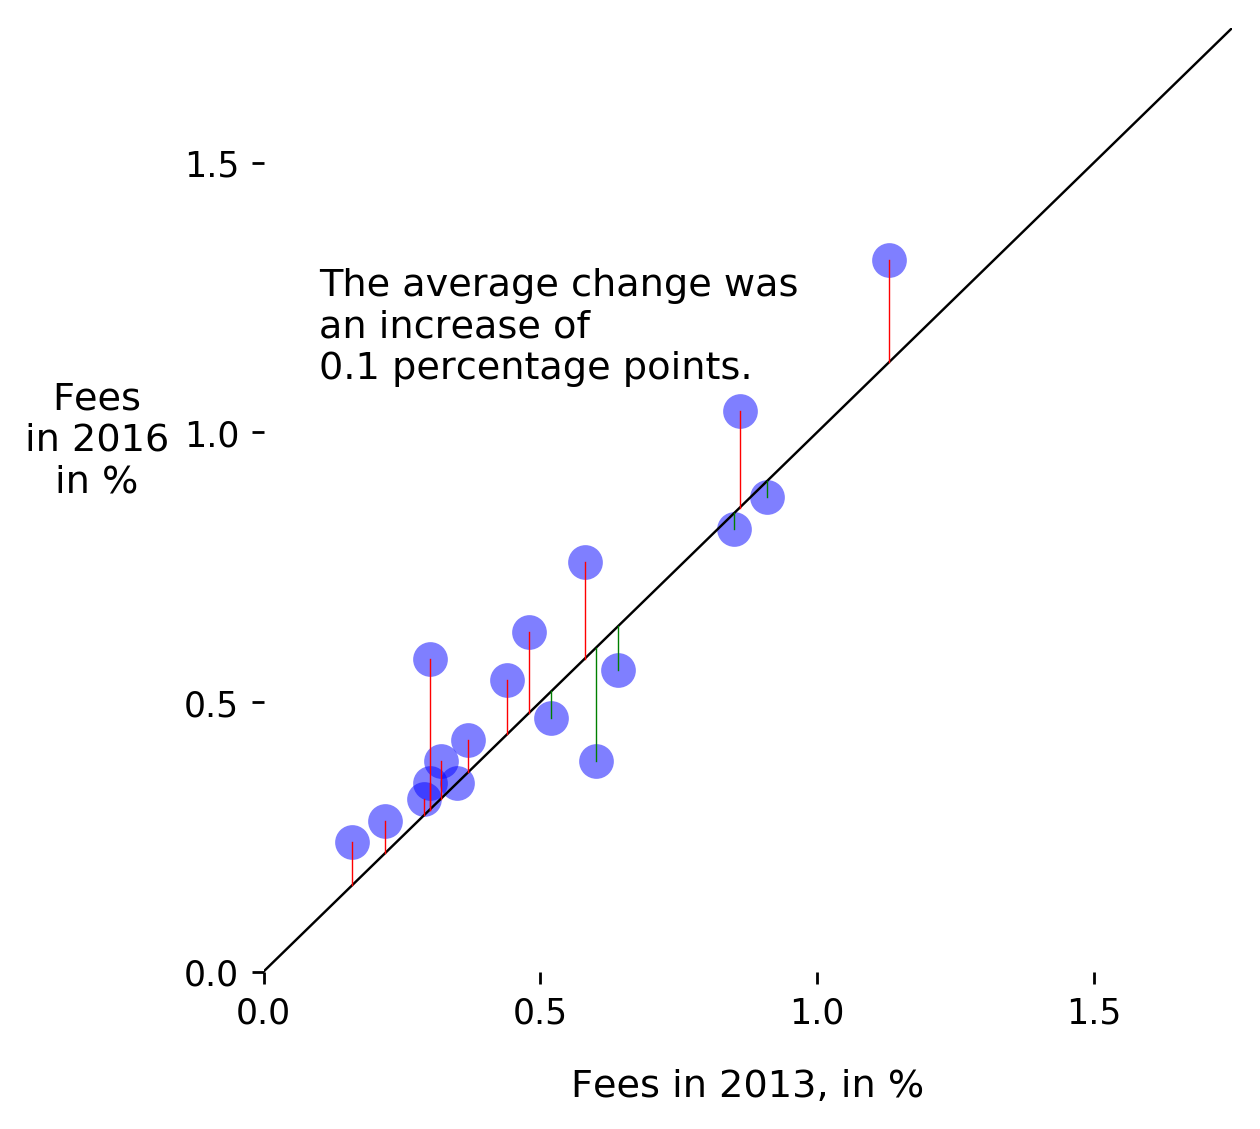

In [332]:
# compare cost changes
x= pf_data_historic.TER_2013
y= pf_data_historic.TER_2016
fig, ax = plt.subplots(figsize=(5,5), dpi=250)
fit = np.polyfit(x, y, deg=1)
ax.set_xlim(0,1.75)
ax.set_ylim(0,1.75)
ax.set_ylabel("Fees\nin 2016\nin %", fontsize=11, rotation=0, labelpad = 25)
ax.set_xlabel("Fees in 2013, in %", fontsize=11, labelpad = 11)
ax.set_xticks([0,0.5,1,1.5])
ax.set_yticks([0,0.5,1,1.5])

ax.scatter(x, y, color="blue", marker="o", label = "Pension funds", s=100, alpha=0.5, linewidth= 0)
x_fit = np.arange(0,56)
y_fit = fit[1] + fit[0]*x_fit
ax.plot(x_fit, x_fit, color="black", linewidth = 0.7)
ax.legend().set_visible(False)
for item in ['top','right','bottom','left']:
    ax.spines[item].set_visible(False)

cost_change = str(round(y.mean()-x.mean(),1))
higher_costs_x = pf_data_historic[pf_data_historic.TER_2016 - pf_data_historic.TER_2013 > 0].TER_2013
higher_costs_y = pf_data_historic[pf_data_historic.TER_2016 - pf_data_historic.TER_2013 > 0].TER_2016
lower_costs_x = pf_data_historic[pf_data_historic.TER_2016 - pf_data_historic.TER_2013 < 0].TER_2013
lower_costs_y = pf_data_historic[pf_data_historic.TER_2016 - pf_data_historic.TER_2013 < 0].TER_2016

ax.plot([lower_costs_x,lower_costs_x],[lower_costs_x,lower_costs_y], color="green", linewidth = 0.4)
ax.plot([higher_costs_x,higher_costs_x],[higher_costs_x,higher_costs_y], color="red", linewidth = 0.4)


ax.text(0.1,1.1,"The average change was\nan increase of\n"+cost_change+" percentage points.",
       fontsize='11')


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:12: RankWarning: Polyfit may be poorly conditioned
  if sys.path[0] == '':


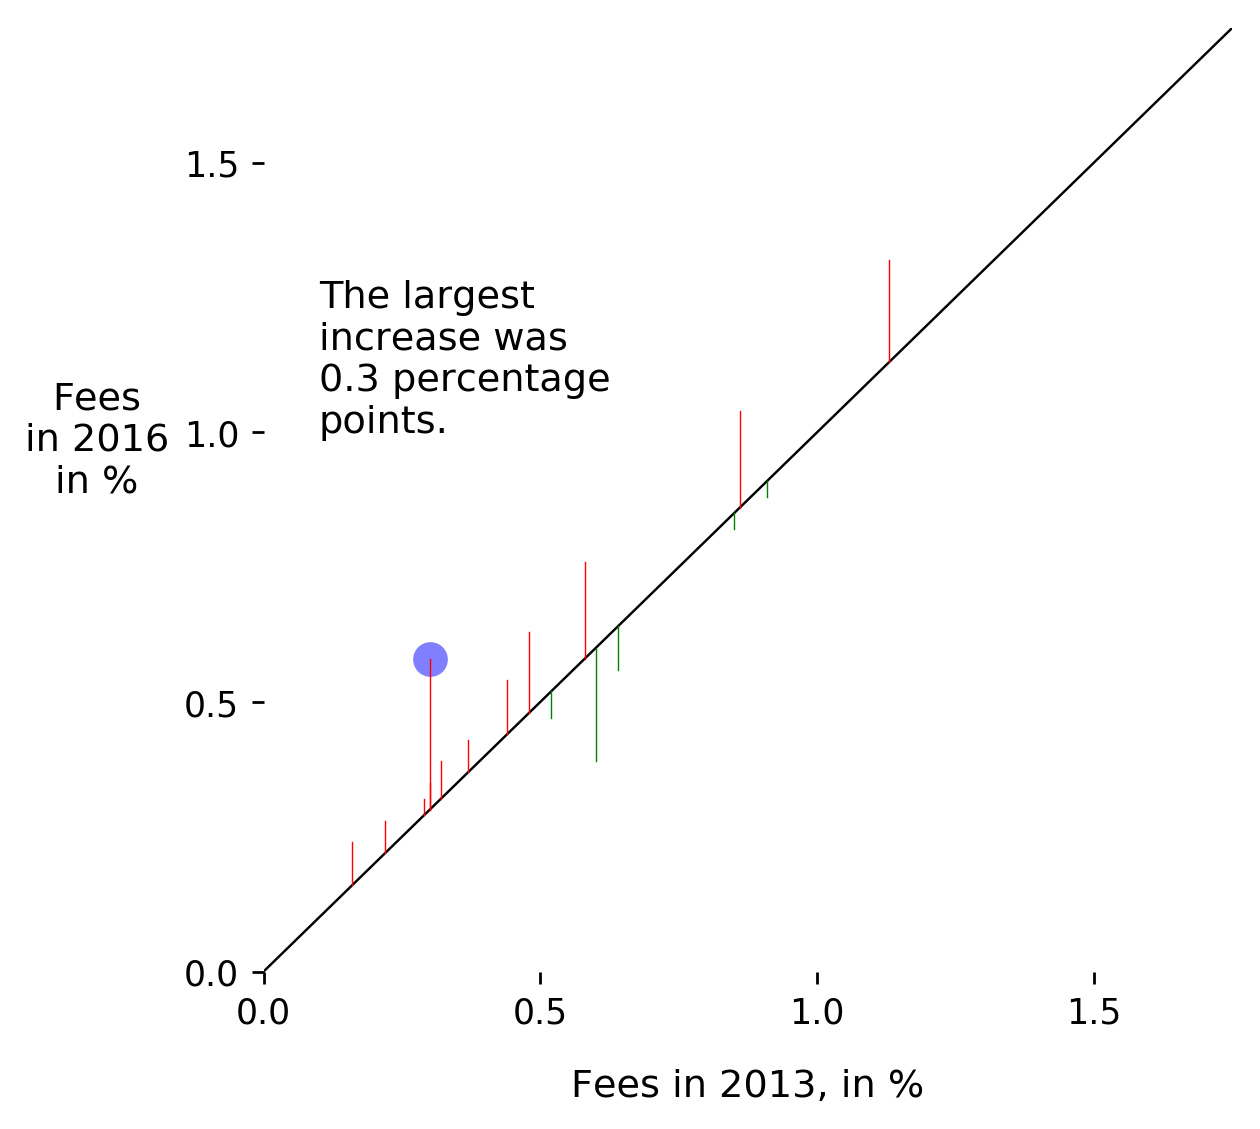

In [337]:
# compare cost changes

max_inc = max(pf_data_historic.TER_2016 - pf_data_historic.TER_2013)

max_inc_df = pf_data_historic[(pf_data_historic.TER_2016 - pf_data_historic.TER_2013) == max_inc]

x= max_inc_df.TER_2013
y= max_inc_df.TER_2016


fig, ax = plt.subplots(figsize=(5,5), dpi=250)
fit = np.polyfit(x, y, deg=1)
ax.set_xlim(0,1.75)
ax.set_ylim(0,1.75)
ax.set_ylabel("Fees\nin 2016\nin %", fontsize=11, rotation=0, labelpad = 25)
ax.set_xlabel("Fees in 2013, in %", fontsize=11, labelpad = 11)
ax.set_xticks([0,0.5,1,1.5])
ax.set_yticks([0,0.5,1,1.5])

ax.scatter(x, y, color="blue", marker="o", label = "Pension funds", s=100, alpha=0.5, linewidth= 0)
x_fit = np.arange(0,56)
y_fit = fit[1] + fit[0]*x_fit
ax.plot(x_fit, x_fit, color="black", linewidth = 0.7)

cost_change = str(round(y.mean()-x.mean(),1))
higher_costs_x = pf_data_historic[pf_data_historic.TER_2016 - pf_data_historic.TER_2013 > 0].TER_2013
higher_costs_y = pf_data_historic[pf_data_historic.TER_2016 - pf_data_historic.TER_2013 > 0].TER_2016
lower_costs_x = pf_data_historic[pf_data_historic.TER_2016 - pf_data_historic.TER_2013 < 0].TER_2013
lower_costs_y = pf_data_historic[pf_data_historic.TER_2016 - pf_data_historic.TER_2013 < 0].TER_2016

ax.plot([lower_costs_x,lower_costs_x],[lower_costs_x,lower_costs_y], color="green", linewidth = 0.4)
ax.plot([higher_costs_x,higher_costs_x],[higher_costs_x,higher_costs_y], color="red", linewidth = 0.4)

ax.text(0.1,1.0,"The largest\nincrease was\n"+cost_change+" percentage\npoints.",fontsize="11")

for item in ['top','right','bottom','left']:
    ax.spines[item].set_visible(False)